In [210]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Shows plots in jupyter notebook
%matplotlib inline

In [211]:
client_df = pd.read_csv(r"E:/Data Analytics/Forage/BCG X DS/Data sets/client_data (1).csv")
price_df = pd.read_csv(r"E:/Data Analytics/Forage/BCG X DS/Data sets/price_data (1).csv")

In [212]:
client_df.head(5)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [213]:
client_df.dtypes

id                                 object
channel_sales                      object
cons_12m                            int64
cons_gas_12m                        int64
cons_last_month                     int64
date_activ                         object
date_end                           object
date_modif_prod                    object
date_renewal                       object
forecast_cons_12m                 float64
forecast_cons_year                  int64
forecast_discount_energy          float64
forecast_meter_rent_12m           float64
forecast_price_energy_off_peak    float64
forecast_price_energy_peak        float64
forecast_price_pow_off_peak       float64
has_gas                            object
imp_cons                          float64
margin_gross_pow_ele              float64
margin_net_pow_ele                float64
nb_prod_act                         int64
net_margin                        float64
num_years_antig                     int64
origin_up                         

In [214]:
#date columns to date_type

for p in ['date_activ','date_end','date_modif_prod','date_renewal']:
    client_df[p] = pd.to_datetime(client_df[p])

In [215]:
client_df.dtypes

id                                        object
channel_sales                             object
cons_12m                                   int64
cons_gas_12m                               int64
cons_last_month                            int64
date_activ                        datetime64[ns]
date_end                          datetime64[ns]
date_modif_prod                   datetime64[ns]
date_renewal                      datetime64[ns]
forecast_cons_12m                        float64
forecast_cons_year                         int64
forecast_discount_energy                 float64
forecast_meter_rent_12m                  float64
forecast_price_energy_off_peak           float64
forecast_price_energy_peak               float64
forecast_price_pow_off_peak              float64
has_gas                                   object
imp_cons                                 float64
margin_gross_pow_ele                     float64
margin_net_pow_ele                       float64
nb_prod_act         

In [216]:
client_df['contract_start_year'] = client_df['date_activ'].dt.year
client_df['contract_end_year'] = client_df['date_end'].dt.year

In [217]:
client_df.dtypes

id                                        object
channel_sales                             object
cons_12m                                   int64
cons_gas_12m                               int64
cons_last_month                            int64
date_activ                        datetime64[ns]
date_end                          datetime64[ns]
date_modif_prod                   datetime64[ns]
date_renewal                      datetime64[ns]
forecast_cons_12m                        float64
forecast_cons_year                         int64
forecast_discount_energy                 float64
forecast_meter_rent_12m                  float64
forecast_price_energy_off_peak           float64
forecast_price_energy_peak               float64
forecast_price_pow_off_peak              float64
has_gas                                   object
imp_cons                                 float64
margin_gross_pow_ele                     float64
margin_net_pow_ele                       float64
nb_prod_act         

In [218]:
price_df.dtypes

id                     object
price_date             object
price_off_peak_var    float64
price_peak_var        float64
price_mid_peak_var    float64
price_off_peak_fix    float64
price_peak_fix        float64
price_mid_peak_fix    float64
dtype: object

In [219]:
price_df.head(5)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [220]:
price_df['price_date'] =pd.to_datetime(price_df['price_date'])

In [221]:
price_df.dtypes

id                            object
price_date            datetime64[ns]
price_off_peak_var           float64
price_peak_var               float64
price_mid_peak_var           float64
price_off_peak_fix           float64
price_peak_fix               float64
price_mid_peak_fix           float64
dtype: object

In [222]:
missing_data = client_df.isnull()
missing_data

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,contract_start_year,contract_end_year
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14602,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14603,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14604,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [223]:
empty_data = client_df.isna()
empty_data

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,contract_start_year,contract_end_year
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14602,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14603,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14604,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [224]:
for col in missing_data.columns.values.tolist():
    print(col)
    print(missing_data[col].value_counts())
    print("")

id
id
False    14606
Name: count, dtype: int64

channel_sales
channel_sales
False    14606
Name: count, dtype: int64

cons_12m
cons_12m
False    14606
Name: count, dtype: int64

cons_gas_12m
cons_gas_12m
False    14606
Name: count, dtype: int64

cons_last_month
cons_last_month
False    14606
Name: count, dtype: int64

date_activ
date_activ
False    14606
Name: count, dtype: int64

date_end
date_end
False    14606
Name: count, dtype: int64

date_modif_prod
date_modif_prod
False    14606
Name: count, dtype: int64

date_renewal
date_renewal
False    14606
Name: count, dtype: int64

forecast_cons_12m
forecast_cons_12m
False    14606
Name: count, dtype: int64

forecast_cons_year
forecast_cons_year
False    14606
Name: count, dtype: int64

forecast_discount_energy
forecast_discount_energy
False    14606
Name: count, dtype: int64

forecast_meter_rent_12m
forecast_meter_rent_12m
False    14606
Name: count, dtype: int64

forecast_price_energy_off_peak
forecast_price_energy_off_peak
False    146

In [225]:
client_df.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn',
       'contract_start_year', 'contract_end_year'],
      dtype='object')

In [226]:
client_df.columns.values

array(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m',
       'cons_last_month', 'date_activ', 'date_end', 'date_modif_prod',
       'date_renewal', 'forecast_cons_12m', 'forecast_cons_year',
       'forecast_discount_energy', 'forecast_meter_rent_12m',
       'forecast_price_energy_off_peak', 'forecast_price_energy_peak',
       'forecast_price_pow_off_peak', 'has_gas', 'imp_cons',
       'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn',
       'contract_start_year', 'contract_end_year'], dtype=object)

In [227]:
if client_df.duplicated().sum()!=0:
        print('There are', client_df.duplicated().sum(), 'duplicate rows\n')
else:
        print('There is no duplicate row\n')

There is no duplicate row



In [228]:
client_df['id'].index

RangeIndex(start=0, stop=14606, step=1)

In [229]:
def describe_categorical(dataset):
    cat_columns = dataset.dtypes[dataset.dtypes=='object'].index.tolist()
    if len(cat_columns)!=0:
        print('Categorical variables are', cat_columns,'\n'+'=='*40)
        for cat in cat_columns:
            describe_frame = dataset[[cat]].value_counts().reset_index(name='count')
            describe_frame['proportion'] = describe_frame['count']/len(dataset)
            print(describe_frame,'\n'+'--'*40)    # display value count and proportion of a categorical feature
    else:
        print('There is no categorical variables in the dataset')

In [230]:
describe_categorical(client_df)

Categorical variables are ['id', 'channel_sales', 'has_gas', 'origin_up'] 
                                     id  count  proportion
0      0002203ffbb812588b632b9e628cc38d      1    0.000068
1      ab250252dfaded1c9a54834f9c829b43      1    0.000068
2      ab32c3a8d93c88b485499566526cb34d      1    0.000068
3      ab3392ec2bfd3605624f31d3c6828c21      1    0.000068
4      ab346731fef5aa291919ea43e45af5a7      1    0.000068
...                                 ...    ...         ...
14601  55091aace7bd0fadd194f46cb4886fea      1    0.000068
14602  550b8d2f9c298abd8f05fca3bc1a13c4      1    0.000068
14603  5514b18508f378a39f41657554aa72e3      1    0.000068
14604  551cb1b1faf72259c2c182dedec12c98      1    0.000068
14605  ffff7fa066f1fb305ae285bb03bf325a      1    0.000068

[14606 rows x 3 columns] 
--------------------------------------------------------------------------------
                      channel_sales  count  proportion
0  foosdfpfkusacimwkcsosbicdxkicaua   6754    0.462413

In [231]:
client_df.dtypes[client_df.dtypes=='object'].index.tolist()

['id', 'channel_sales', 'has_gas', 'origin_up']

In [232]:
from sklearn.preprocessing import LabelEncoder

In [233]:
ch_enc = LabelEncoder()
client_df['channel_sales'] = ch_enc.fit_transform(client_df['channel_sales'])
org_enc = LabelEncoder()
client_df['origin_up'] = org_enc.fit_transform(client_df['origin_up'])

In [234]:
client_df['channel_sales'].value_counts()

channel_sales
4    6754
0    3725
5    1843
7    1375
2     893
6      11
1       3
3       2
Name: count, dtype: int64

In [235]:
def describe_int_numeric(dataset):
    # for numeric columns whose values are discrete, display values and their frequency
    int64_columns = dataset.dtypes[dataset.dtypes=='int64'].index.tolist()
    int32_columns = dataset.dtypes[dataset.dtypes=='int'].index.tolist()
    if len(int64_columns)+len(int32_columns)!=0:
        print('Integer variables are', int64_columns+int32_columns,'\n'+'=='*40)
        # integer numeric feature
        if len(int64_columns)!=0:    
            for cat in int64_columns:
                describe_frame = dataset[[cat]].value_counts().reset_index(name='count')
                describe_frame['proportion'] = describe_frame['count']/len(dataset)
                print(describe_frame,'\n'+'--'*40)
        elif len(int32_columns)!=0:  
            for c in int32_columns:
                describe_frame = dataset[[c]].value_counts().reset_index(name='count')
                describe_frame['proportion'] = describe_frame['count']/len(dataset)
                print(describe_frame,'\n'+'--'*40)
        else:
            print("There are no numerical columns")
    print(dataset[int64_columns+ int32_columns].describe().loc[['min','max','mean','50%']].T.rename(columns={'50%':'median'}), '\n'+'--'*40)
    

In [236]:
describe_int_numeric(client_df)

Integer variables are ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_year', 'nb_prod_act', 'num_years_antig', 'churn', 'channel_sales', 'origin_up', 'contract_start_year', 'contract_end_year'] 
       cons_12m  count  proportion
0             0    117    0.008010
1       2882597     27    0.001849
2       3329244     24    0.001643
3       1743025     18    0.001232
4       3926060     18    0.001232
...         ...    ...         ...
11060     10297      1    0.000068
11061     10305      1    0.000068
11062     10311      1    0.000068
11063     10312      1    0.000068
11064     14285      1    0.000068

[11065 rows x 3 columns] 
--------------------------------------------------------------------------------
      cons_gas_12m  count  proportion
0                0  11994    0.821169
1           976731     27    0.001849
2           867921     24    0.001643
3          1959386     18    0.001232
4            41532     18    0.001232
...            ...    ...         

In [237]:
client_df.dtypes

id                                        object
channel_sales                              int32
cons_12m                                   int64
cons_gas_12m                               int64
cons_last_month                            int64
date_activ                        datetime64[ns]
date_end                          datetime64[ns]
date_modif_prod                   datetime64[ns]
date_renewal                      datetime64[ns]
forecast_cons_12m                        float64
forecast_cons_year                         int64
forecast_discount_energy                 float64
forecast_meter_rent_12m                  float64
forecast_price_energy_off_peak           float64
forecast_price_energy_peak               float64
forecast_price_pow_off_peak              float64
has_gas                                   object
imp_cons                                 float64
margin_gross_pow_ele                     float64
margin_net_pow_ele                       float64
nb_prod_act         

In [238]:
def desc_float(dataset):
    float_columns = dataset.dtypes[dataset.dtypes=='float'].index.tolist()
    if len(float_columns)!=0:
            for flt in float_columns:
                describe_frame = dataset[[flt]].value_counts().reset_index(name='count')
                describe_frame['proportion'] = describe_frame['count']/len(dataset)
                print(describe_frame,'\n'+'--'*40)
    else:
        print('There is no continuous numeric variables in the dataset')
    print(dataset[float_columns].describe().loc[['min','max','mean','50%']].T.rename(columns={'50%':'median'}), '\n'+'--'*40)

In [239]:
desc_float(dataset=client_df)

       forecast_cons_12m  count  proportion
0                   0.00    306    0.020950
1                   0.15      6    0.000411
2                 415.14      4    0.000274
3                1210.67      3    0.000205
4                 651.21      3    0.000205
...                  ...    ...         ...
13988             728.43      1    0.000068
13989             728.53      1    0.000068
13990             728.68      1    0.000068
13991             728.93      1    0.000068
13992           82902.83      1    0.000068

[13993 rows x 3 columns] 
--------------------------------------------------------------------------------
    forecast_discount_energy  count  proportion
0                        0.0  14094    0.964946
1                       30.0    260    0.017801
2                       28.0    102    0.006983
3                       24.0     83    0.005683
4                       22.0     47    0.003218
5                       25.0      7    0.000479
6                       26.0

                                min           max         mean       median
forecast_cons_12m               0.0  82902.830000  1868.614880  1112.875000
forecast_discount_energy        0.0     30.000000     0.966726     0.000000
forecast_meter_rent_12m         0.0    599.310000    63.086871    18.795000
forecast_price_energy_off_peak  0.0      0.273963     0.137283     0.143166
forecast_price_energy_peak      0.0      0.195975     0.050491     0.084138
forecast_price_pow_off_peak     0.0     59.266378    43.130056    44.311378
imp_cons                        0.0  15042.790000   152.786896    37.395000
margin_gross_pow_ele            0.0    374.640000    24.565121    21.640000
margin_net_pow_ele              0.0    374.640000    24.562517    21.640000
net_margin                      0.0  24570.650000   189.264522   112.530000
pow_max                         3.3    320.000000    18.135136    13.856000 
--------------------------------------------------------------------------------


In [240]:
#Check datetime features

client_df[client_df.dtypes[client_df.dtypes=='datetime64[ns]'].index.to_list()].describe()

,date_activ,date_end,date_modif_prod,date_renewal
count,14606,14606,14606,14606
mean,2011-01-28 07:54:18.879912448,2016-07-27 20:48:26.422018560,2013-01-02 12:29:10.951663872,2015-07-21 06:59:00.353279488
min,2003-05-09 00:00:00,2016-01-28 00:00:00,2003-05-09 00:00:00,2013-06-26 00:00:00
25%,2010-01-15 00:00:00,2016-04-27 06:00:00,2010-08-12 00:00:00,2015-04-17 00:00:00
50%,2011-03-04 00:00:00,2016-08-01 00:00:00,2013-06-19 00:00:00,2015-07-27 00:00:00
75%,2012-04-19 00:00:00,2016-10-31 00:00:00,2015-06-16 00:00:00,2015-10-29 00:00:00
max,2014-09-01 00:00:00,2017-06-13 00:00:00,2016-01-29 00:00:00,2016-01-28 00:00:00


In [241]:
missing_price = price_df.isna()

In [242]:
for c in missing_price.columns.values.tolist():
    print(col)
    print(missing_price[c].value_counts())
    print("")

contract_end_year
id
False    193002
Name: count, dtype: int64

contract_end_year
price_date
False    193002
Name: count, dtype: int64

contract_end_year
price_off_peak_var
False    193002
Name: count, dtype: int64

contract_end_year
price_peak_var
False    193002
Name: count, dtype: int64

contract_end_year
price_mid_peak_var
False    193002
Name: count, dtype: int64

contract_end_year
price_off_peak_fix
False    193002
Name: count, dtype: int64

contract_end_year
price_peak_fix
False    193002
Name: count, dtype: int64

contract_end_year
price_mid_peak_fix
False    193002
Name: count, dtype: int64



In [243]:
if price_df.duplicated().sum()!=0:
    print('There are', price_df.duplicated().sum(), 'duplicated rows')
else:
    print('There are no dupl. rows')

There are no dupl. rows


In [244]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  193002 non-null  object        
 1   price_date          193002 non-null  datetime64[ns]
 2   price_off_peak_var  193002 non-null  float64       
 3   price_peak_var      193002 non-null  float64       
 4   price_mid_peak_var  193002 non-null  float64       
 5   price_off_peak_fix  193002 non-null  float64       
 6   price_peak_fix      193002 non-null  float64       
 7   price_mid_peak_fix  193002 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 11.8+ MB


In [245]:
desc_float(dataset=price_df)

      price_off_peak_var  count  proportion
0               0.152445   6291    0.032596
1               0.151367   5652    0.029285
2               0.125976   5139    0.026627
3               0.127566   4373    0.022658
4               0.147600   4285    0.022202
...                  ...    ...         ...
1848            0.166819      1    0.000005
1849            0.179878      1    0.000005
1850            0.144304      1    0.000005
1851            0.144054      1    0.000005
1852            0.144518      1    0.000005

[1853 rows x 3 columns] 
--------------------------------------------------------------------------------
      price_peak_var  count  proportion
0           0.000000  86802    0.449747
1           0.103395   5139    0.026627
2           0.105428   4766    0.024694
3           0.100491   4101    0.021248
4           0.106863   2866    0.014850
...              ...    ...         ...
1184        0.100496      1    0.000005
1185        0.100728      1    0.000005
1186 

In [246]:
describe_categorical(dataset=price_df)

Categorical variables are ['id'] 
                                     id  count  proportion
0      0002203ffbb812588b632b9e628cc38d     12    0.000062
1      ab07311332ad017c071947aa1747bf9e     12    0.000062
2      aab99b3be145225dbff8551b256da9e0     12    0.000062
3      aac9a198cee4c2eb9d975ca21b38f00b     12    0.000062
4      aacb5f6ab9d32c8cc9e58c505b028d24     12    0.000062
...                                 ...    ...         ...
16091  83cf18b07114e495ae8b7fb235e45ee2      8    0.000041
16092  223a98d3832ece78cbf279a194868b54      8    0.000041
16093  bf89f2d8c1b133a134fd93603cb4c947      7    0.000036
16094  c5dcd5c506e565aaabffa29bc1ec0a37      7    0.000036
16095  15b36e47cf04bf151e3f4438d12672e5      7    0.000036

[16096 rows x 3 columns] 
--------------------------------------------------------------------------------


In [247]:
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,contract_start_year,contract_end_year
0,24011ae4ebbe3035111d65fa7c15bc57,4,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,25.44,25.44,2,678.99,3,4,43.648,1,2013,2016
1,d29c2c54acc38ff3c0614d0a653813dd,0,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,16.38,16.38,1,18.89,6,2,13.800,0,2009,2016
2,764c75f661154dac3a6c254cd082ea7d,4,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,28.60,28.60,1,6.60,6,2,13.856,0,2010,2016
3,bba03439a292a1e166f80264c16191cb,5,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,30.22,30.22,1,25.46,6,2,13.200,0,2010,2016
4,149d57cf92fc41cf94415803a877cb4b,0,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,44.91,44.91,1,47.98,6,2,19.800,0,2010,2016


In [248]:
# define a function to plot bar chart to display a feature's distribution with percent labels.
def plot_bar_chart_with_percent_label(df, target_variable, if_sort=False, gap_label_bar=0, figsize=(9,6)):
    # prepare data
    plot_data = df[[target_variable]].value_counts().reset_index(name='count')
    plot_data['percent'] = plot_data['count']/plot_data['count'].sum()
    if if_sort:
        x_order = plot_data.sort_values(by=['percent'], ascending=False)[target_variable]
    else:
        x_order = plot_data.sort_values(by=[target_variable], ascending=True)[target_variable]
    # plot
    fig = plt.figure(figsize=figsize)
    ax = sns.barplot(data=plot_data, x=target_variable, y='percent', order=x_order)
    # add label
    for p in ax.patches:
        x = p.get_x() + p.get_width()/2
        y = p.get_height() + gap_label_bar
        ax.annotate(text='{:.2f}%'.format(p.get_height()*100), xy=(x, y), ha='center')
    ax.margins(y=0.1)

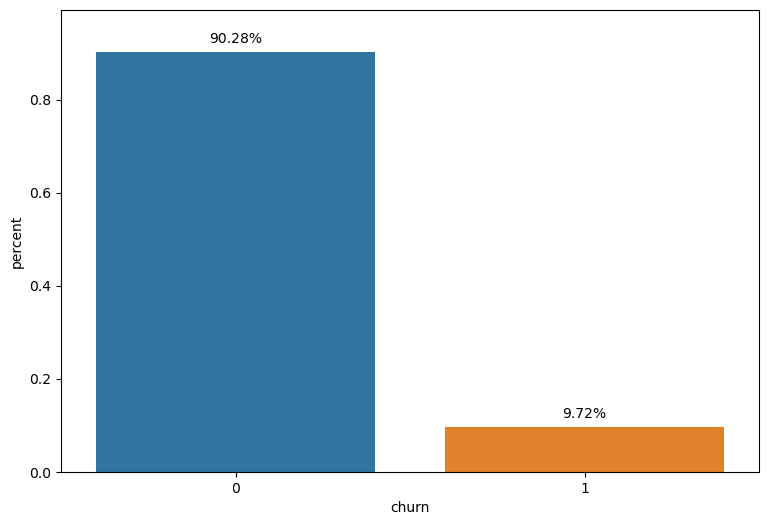

In [249]:
plot_bar_chart_with_percent_label(df=client_df,target_variable='churn',gap_label_bar=0.02)

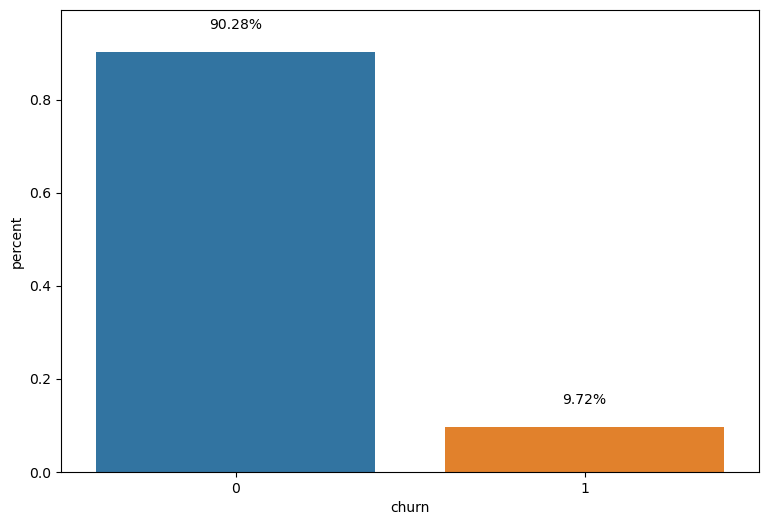

In [250]:
plot_bar_chart_with_percent_label(df=client_df,target_variable='churn',gap_label_bar=0.05)

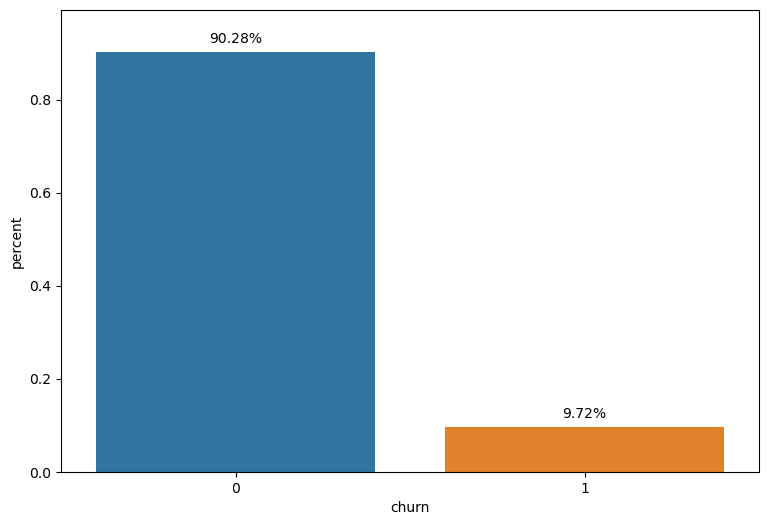

In [251]:
plot_bar_chart_with_percent_label(df=client_df,target_variable='churn',if_sort='True',gap_label_bar=0.02)

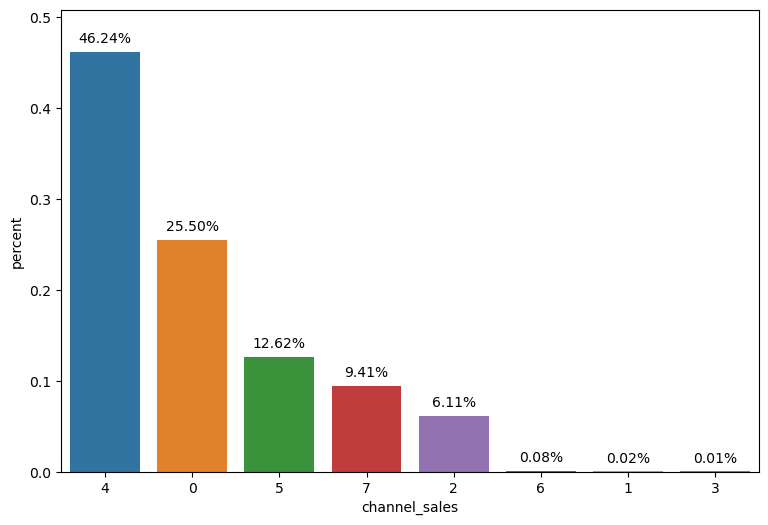

In [252]:
plot_bar_chart_with_percent_label(df=client_df,target_variable='channel_sales',if_sort='True',gap_label_bar=0.01)
#Type 4 is the most common sales channel. Type 1, 3 and 6 sales channels are very rare.

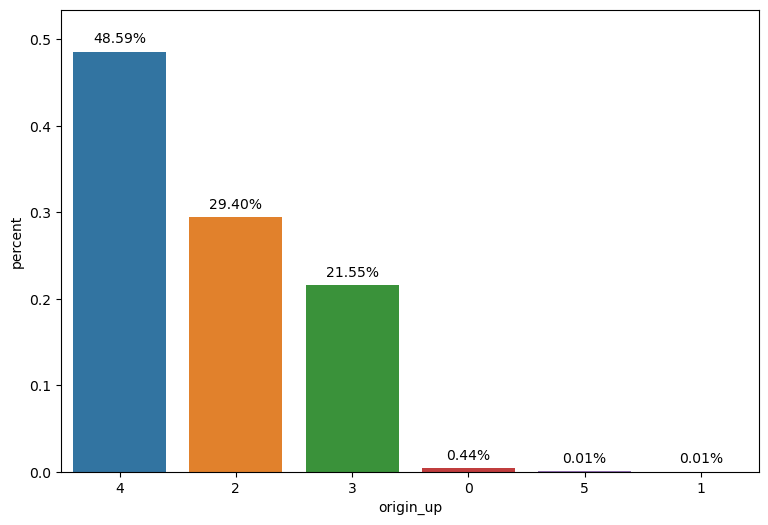

In [253]:
plot_bar_chart_with_percent_label(df=client_df,target_variable='origin_up',if_sort='True',gap_label_bar=0.01)
#Type 4 is the most common electricty campaign that customers first subscribed to. 
#Very few customers first subscribed to Type 0, 1 and 5 electricity campaign.

In [254]:
plot_data_1 = client_df.groupby(['origin_up','churn']).size().reset_index(name='count')
plot_data_2 = plot_data_1.pivot(index='origin_up', columns='churn', values='count').fillna(0)
plot_data_3 = plot_data_2.div(plot_data_2.sum(axis=1),axis=0)
print(plot_data_1)
print(plot_data_2)
print(plot_data_3)

   origin_up  churn  count
0          0      0     60
1          0      1      4
2          1      0      1
3          2      0   4036
4          2      1    258
5          3      0   2884
6          3      1    264
7          4      0   6204
8          4      1    893
9          5      0      2
churn           0      1
origin_up               
0            60.0    4.0
1             1.0    0.0
2          4036.0  258.0
3          2884.0  264.0
4          6204.0  893.0
5             2.0    0.0
churn             0         1
origin_up                    
0          0.937500  0.062500
1          1.000000  0.000000
2          0.939916  0.060084
3          0.916137  0.083863
4          0.874172  0.125828
5          1.000000  0.000000


In [255]:
plot_data_1 = client_df.groupby(['contract_start_year','churn']).size().reset_index(name='count')
plot_data_2 = plot_data_1.pivot(index='contract_start_year', columns='churn', values='count').fillna(0)
plot_data_3 = plot_data_2.div(plot_data_2.sum(axis=1),axis=0)
print(plot_data_1)
print(plot_data_2)
print(plot_data_3)

    contract_start_year  churn  count
0                  2003      0     35
1                  2003      1      4
2                  2004      0    125
3                  2004      1     12
4                  2005      0    179
5                  2005      1     10
6                  2006      0     34
7                  2006      1      2
8                  2007      0     93
9                  2007      1      2
10                 2008      0    118
11                 2008      1      6
12                 2009      0   2481
13                 2009      1    209
14                 2010      0   3350
15                 2010      1    259
16                 2011      0   2486
17                 2011      1    272
18                 2012      0   3248
19                 2012      1    456
20                 2013      0   1037
21                 2013      1    187
22                 2014      0      1
churn                     0      1
contract_start_year               
2003              

In [256]:
plot_data_1 = client_df.groupby(['channel_sales','churn']).size().reset_index(name='count')
plot_data_2 = plot_data_1.pivot(index='channel_sales', columns='churn', values='count').fillna(0)
plot_data_3 = plot_data_2.div(plot_data_2.sum(axis=1),axis=0)
print(plot_data_1)
print(plot_data_2)
print(plot_data_3)

    channel_sales  churn  count
0               0      0   3442
1               0      1    283
2               1      0      3
3               2      0    818
4               2      1     75
5               3      0      2
6               4      0   5934
7               4      1    820
8               5      0   1740
9               5      1    103
10              6      0     11
11              7      0   1237
12              7      1    138
churn               0      1
channel_sales               
0              3442.0  283.0
1                 3.0    0.0
2               818.0   75.0
3                 2.0    0.0
4              5934.0  820.0
5              1740.0  103.0
6                11.0    0.0
7              1237.0  138.0
churn                 0         1
channel_sales                    
0              0.924027  0.075973
1              1.000000  0.000000
2              0.916013  0.083987
3              1.000000  0.000000
4              0.878590  0.121410
5              0.944113 

In [257]:
# plot stacked bar chart with percent label by churn
def plot_stacked_bar_with_percent_label_by_churn(df, target_variable, if_sort=False, figsize=(9,6)):
    plot_data = df.groupby([target_variable,'churn']).size().reset_index(name='count')
    plot_data = plot_data.pivot(index=target_variable, columns='churn', values='count').fillna(0)
    plot_data = plot_data.div(plot_data.sum(axis=1), axis=0)
    if if_sort:
        plot_data = plot_data.sort_values(by=[0])
    ax = plot_data.plot(kind='bar', rot=False, stacked=True, figsize=figsize)
    plt.legend(['stay', 'switch'], loc='upper center', ncol=2)
    # add label
    for p in ax.patches:
        percentage = '{:.1f}%'.format(p.get_height()*100)
        if percentage!='0.0%':
            x = p.get_x() + p.get_width()/2
            y = 1 - p.get_height()/1.8
            ax.annotate(text=percentage, xy=(x, y), ha='center')
    ax.margins(y=0.1)

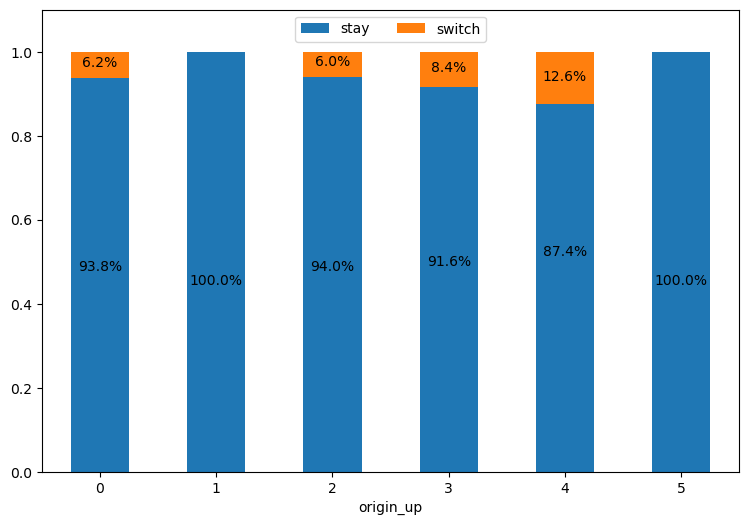

In [258]:
#with ncol
plot_stacked_bar_with_percent_label_by_churn(df=client_df,target_variable='origin_up')

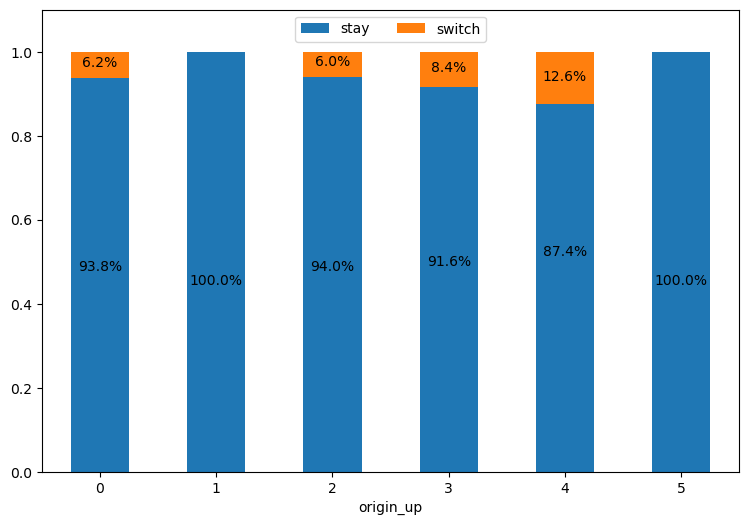

In [259]:
#WITHOUT ncol
plot_stacked_bar_with_percent_label_by_churn(df=client_df,target_variable='origin_up')

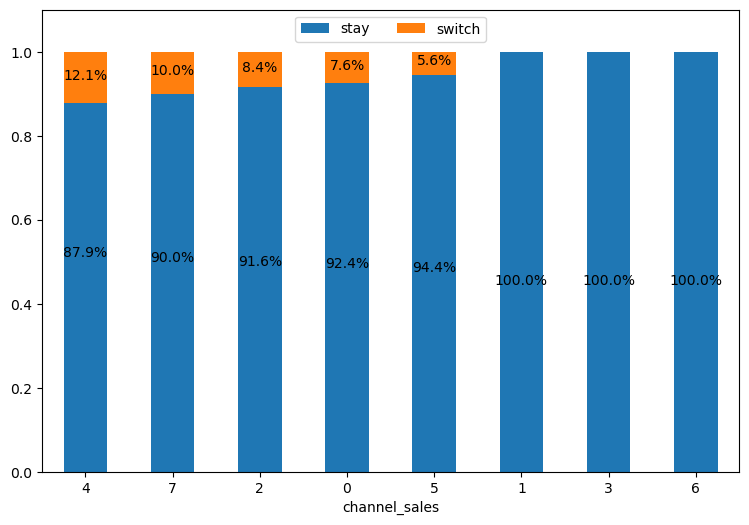

In [260]:
plot_stacked_bar_with_percent_label_by_churn(df=client_df,target_variable='channel_sales',if_sort=True)
#For the customers from different sales channels, 
#the proportion of churning customers ranges from 5.6% to 12.1% (excluding rare channels).

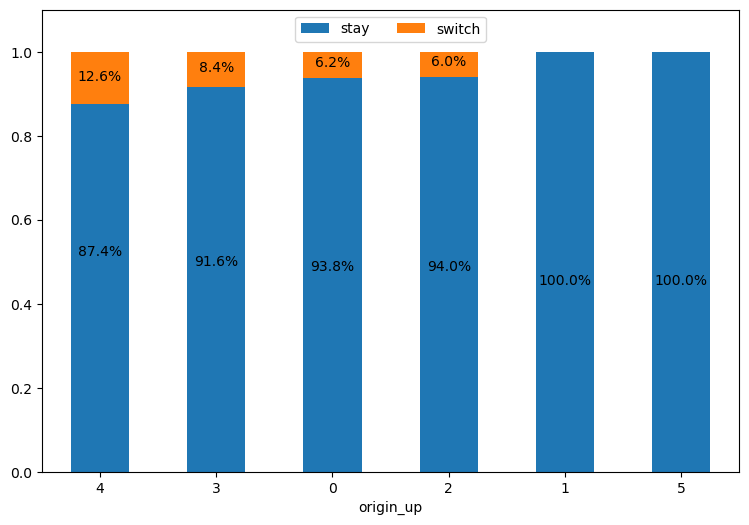

In [261]:
plot_stacked_bar_with_percent_label_by_churn(df=client_df,target_variable='origin_up',if_sort=True)
#For the customers who first subscribed to different electricity campaigns, 
#the proportion of churning customers ranges from 6.0% to 12.6% (excluding type 1 and type 5)

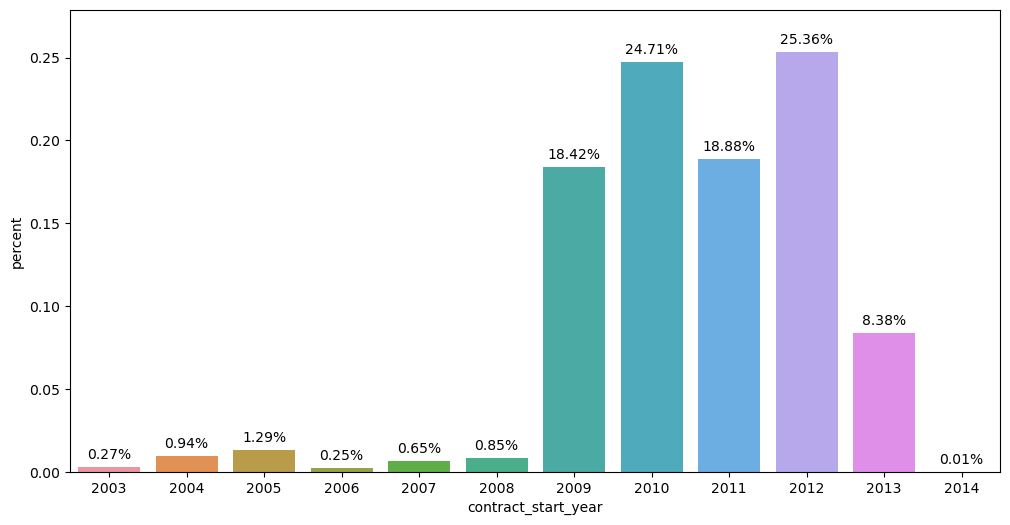

In [262]:
plot_bar_chart_with_percent_label(df=client_df, target_variable='contract_start_year', if_sort=False, gap_label_bar=0.005, figsize=(12,6))
#Most customers started their contracts from 2009 to 2013. 
#Among these customers, it seems newer customers are more likely to switch to other providers.

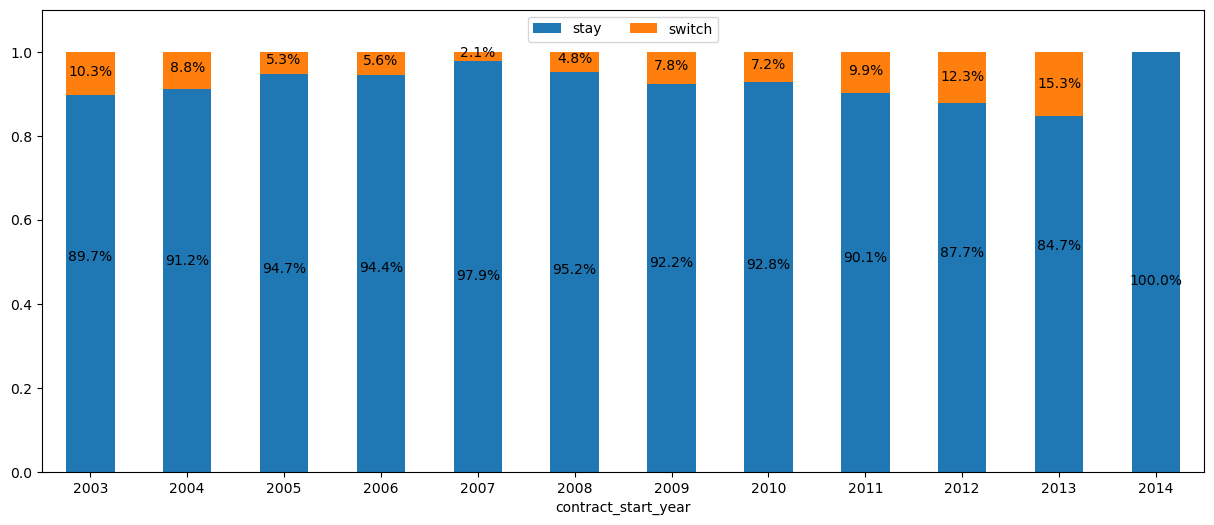

In [263]:
plot_stacked_bar_with_percent_label_by_churn(df=client_df, target_variable='contract_start_year', if_sort=False, figsize=(15,6))

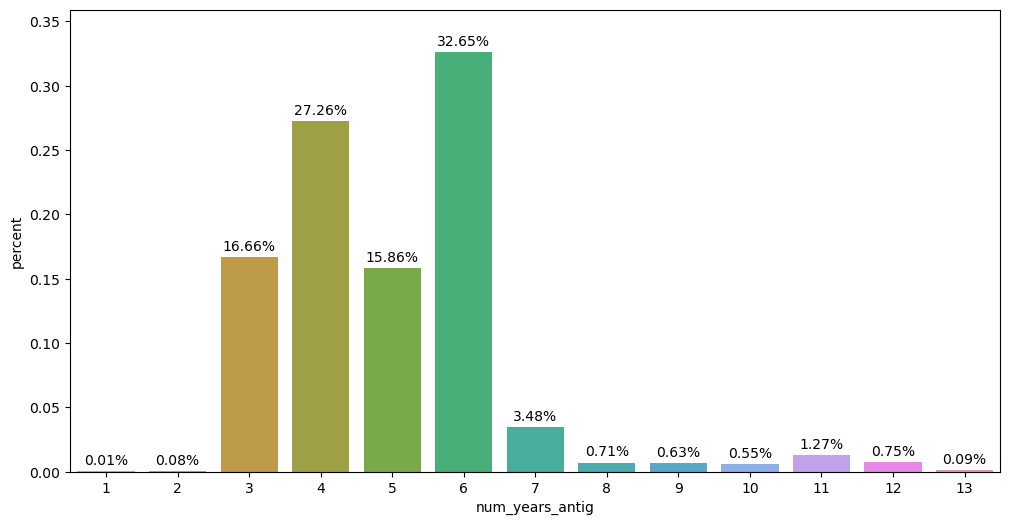

In [264]:
plot_bar_chart_with_percent_label(df=client_df, target_variable='num_years_antig', if_sort=False, gap_label_bar=0.005, figsize=(12,6))
#Most customers stayed with the current providers for 3 to 6 years.
#Among these customers, it seems newer customers are more likely to switch to other providers.

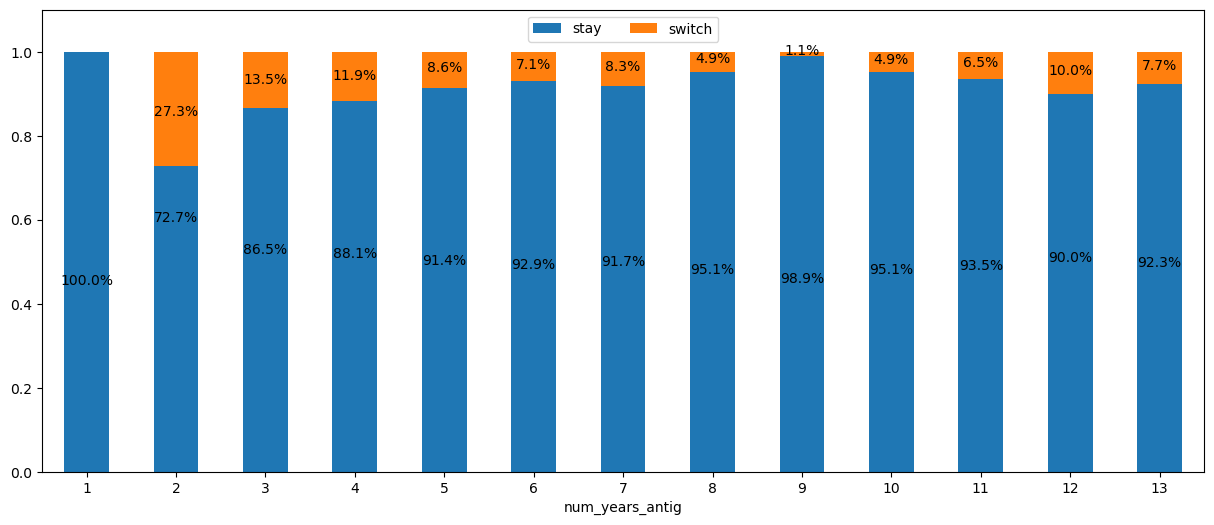

In [265]:
plot_stacked_bar_with_percent_label_by_churn(df=client_df, target_variable='num_years_antig', if_sort=False, figsize=(15,6))

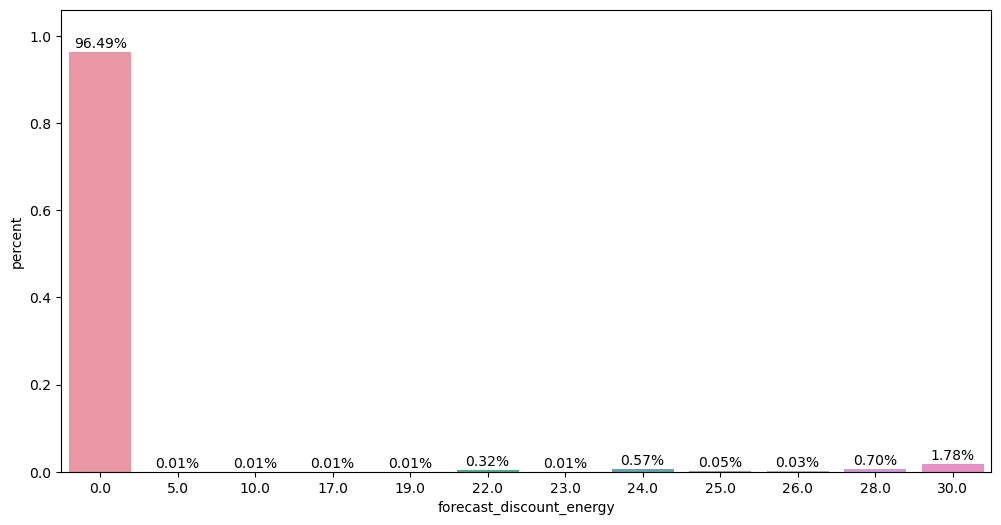

In [266]:
plot_bar_chart_with_percent_label(df=client_df, target_variable='forecast_discount_energy', if_sort=False, gap_label_bar=0.01, figsize=(12,6))
#The vast majority of customers' forecasted value of current discount is 0.

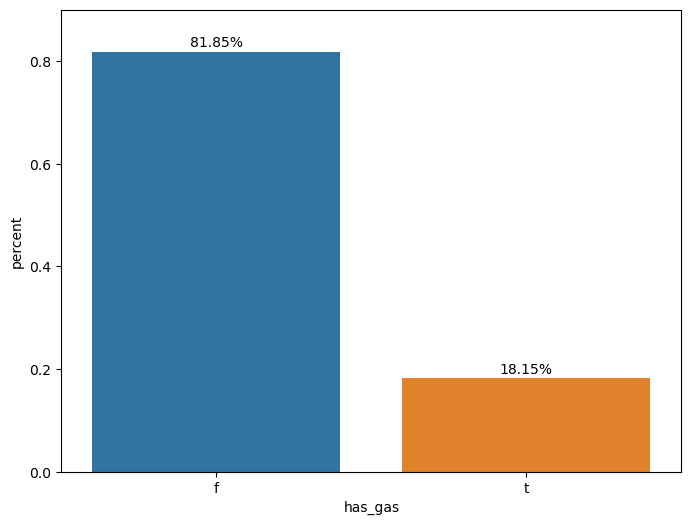

In [267]:
plot_bar_chart_with_percent_label(df=client_df, target_variable='has_gas', if_sort=False, gap_label_bar=0.01, figsize=(8,6))
#Only 18.15% of the clients were also gas clients.

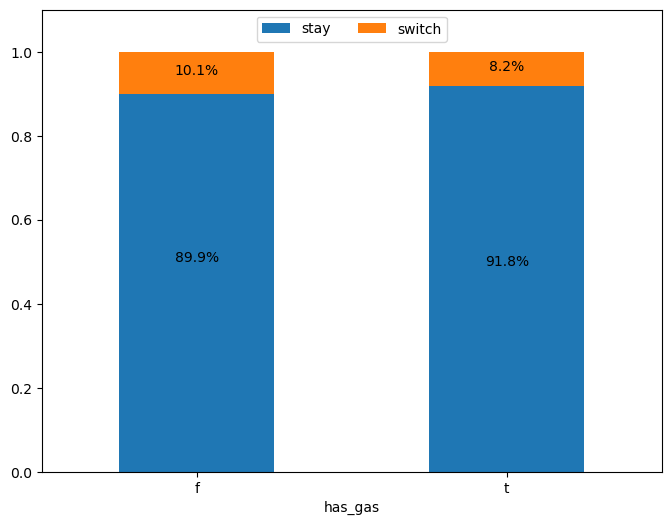

In [268]:
plot_stacked_bar_with_percent_label_by_churn(df=client_df, target_variable='has_gas', if_sort=False, figsize=(8,6))
#Electricity clients are more likely to churn than electricity and gas clients.

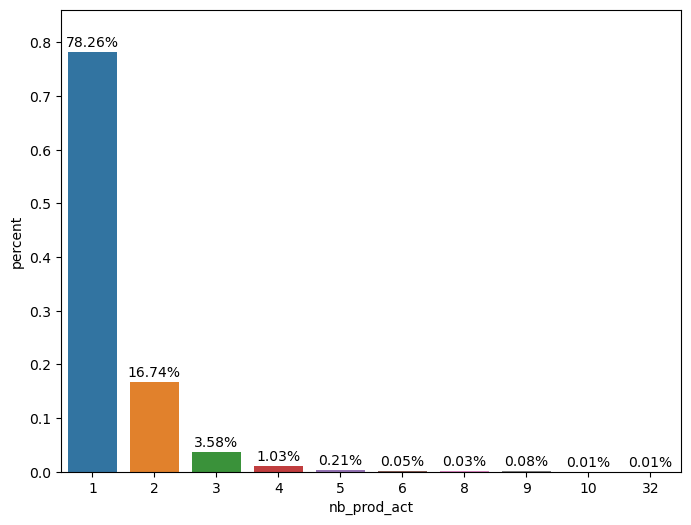

In [269]:
plot_bar_chart_with_percent_label(df=client_df, target_variable='nb_prod_act', if_sort=False, gap_label_bar=0.01, figsize=(8,6))
#Most customers only had 1 or 2 active products and services.

In [270]:
# PLOT HISTOGRAM FOR CONTINUOUS VARIABLES

def plot_histogram_by_churn(df,target_variable,figsize=(20,5),bins=50,if_churn=True):
    fig=plt.figure(figsize=figsize)    
    if if_churn:
        ax=sns.histplot(data=df,x=target_variable,bins=bins,hue='churn')
    else:
        ax=sns.histplot(data=df,x=target_variable,bins=bins)

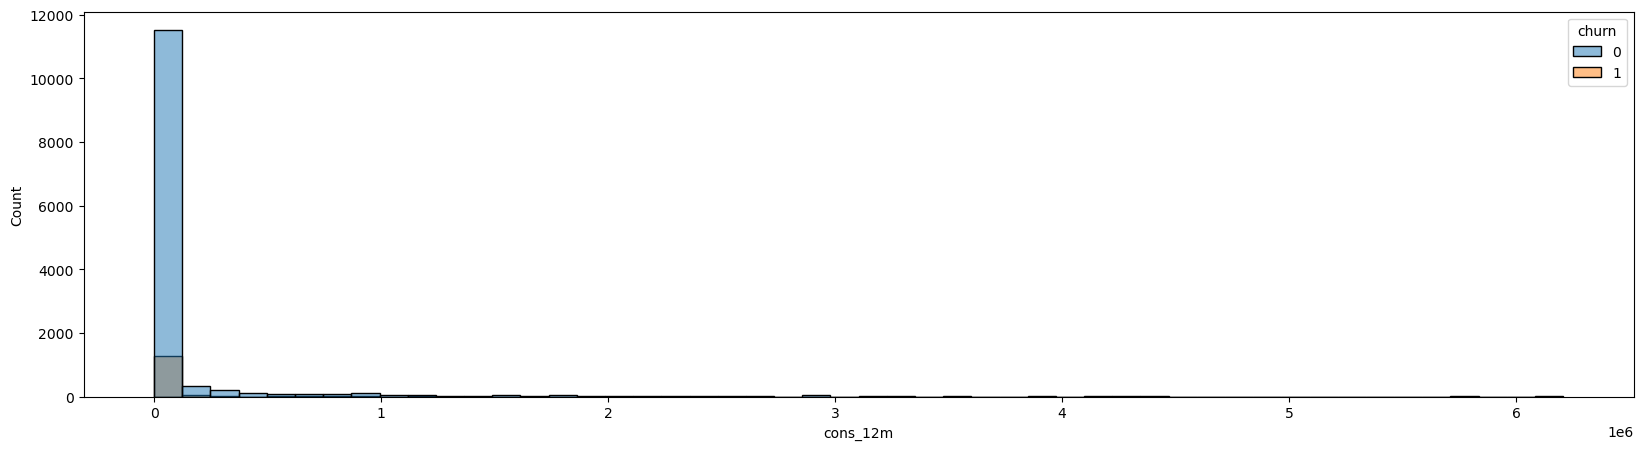

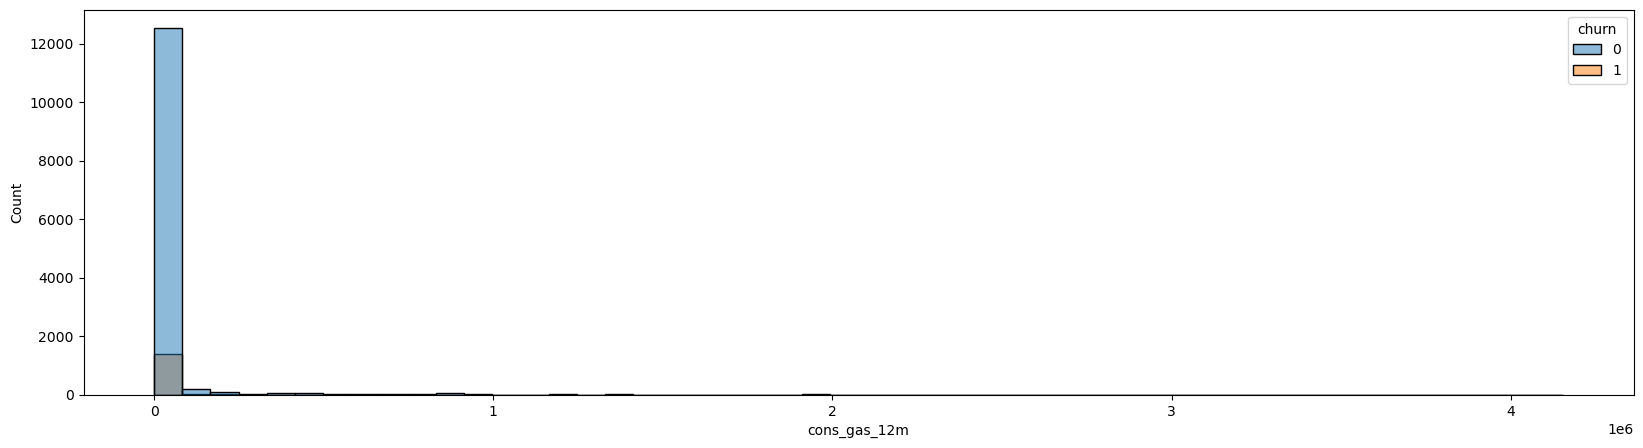

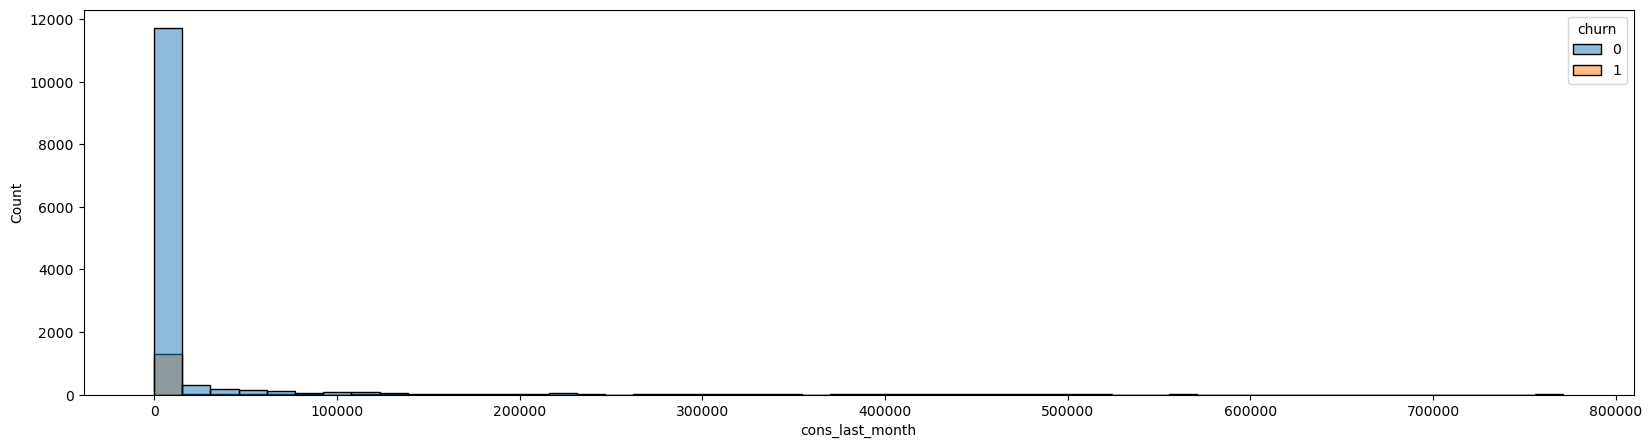

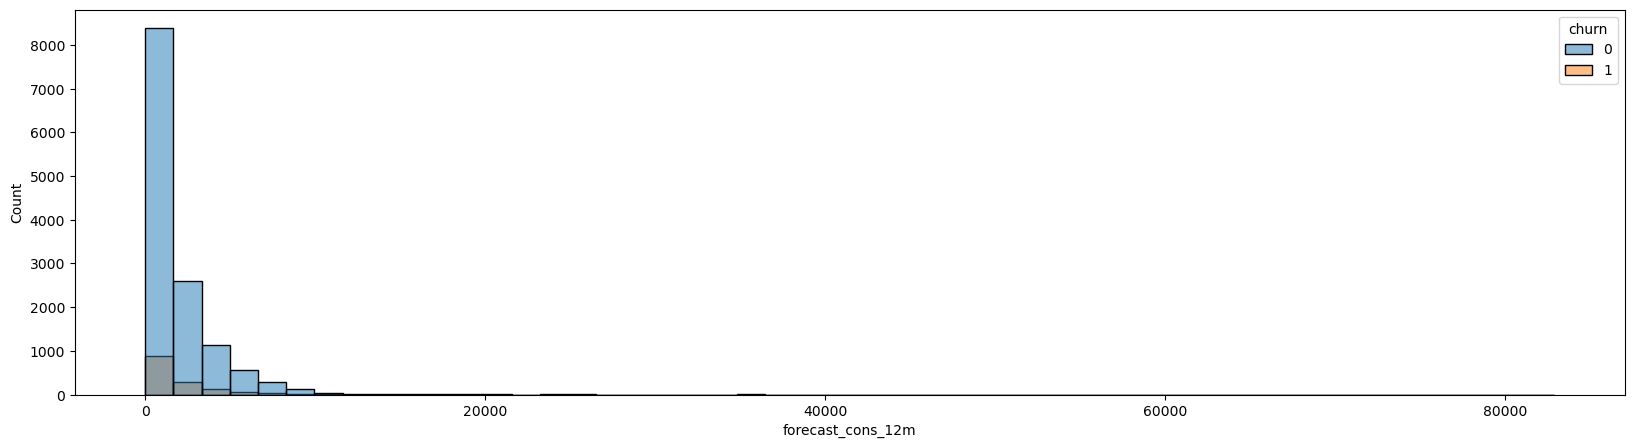

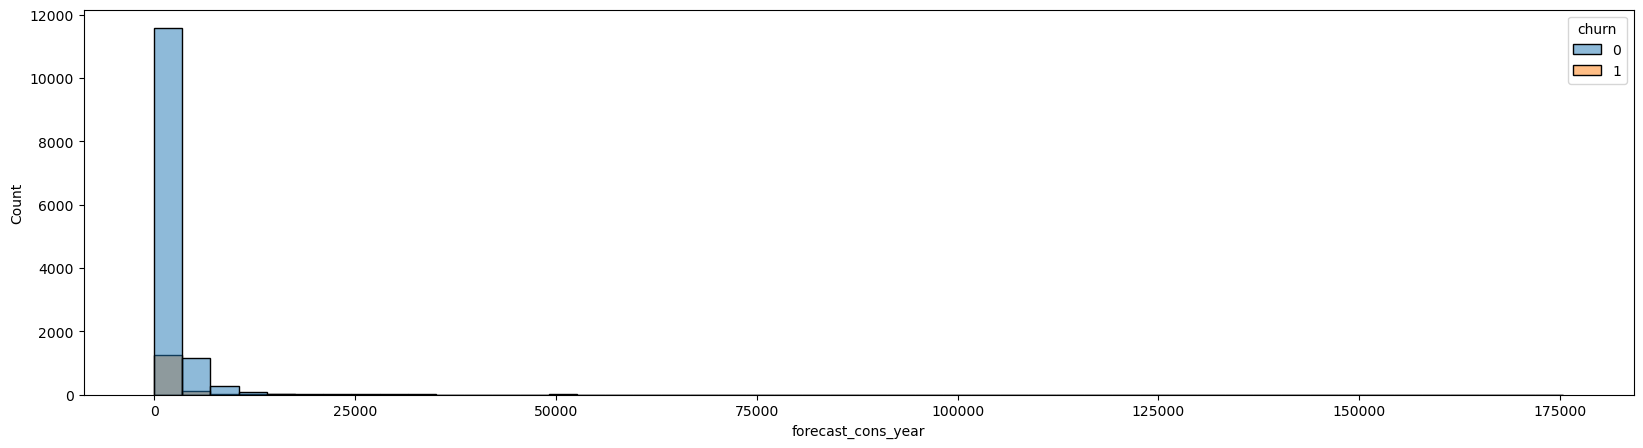

In [271]:
for attr in ['cons_12m', 'cons_gas_12m', 'cons_last_month','forecast_cons_12m', 'forecast_cons_year']:
    plot_histogram_by_churn(client_df,attr)

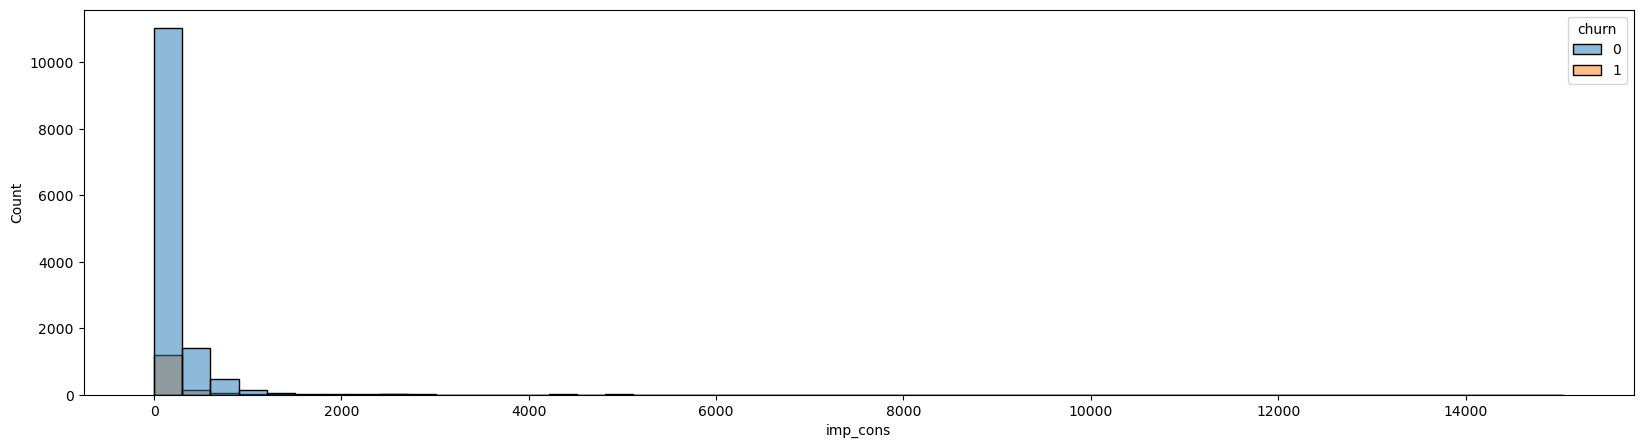

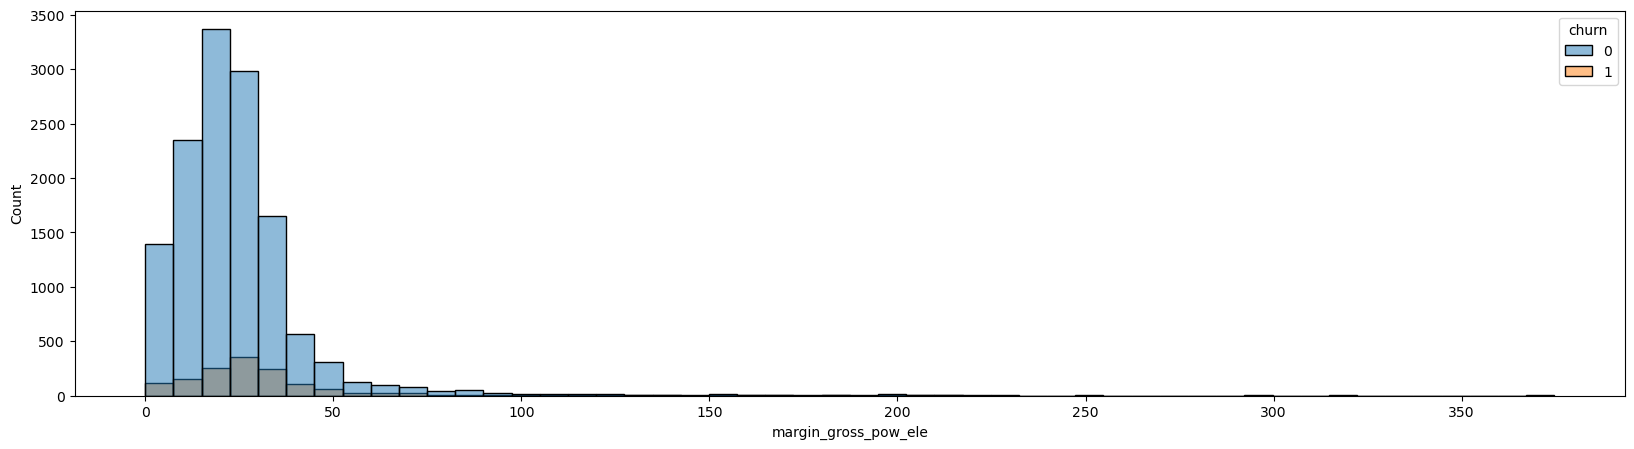

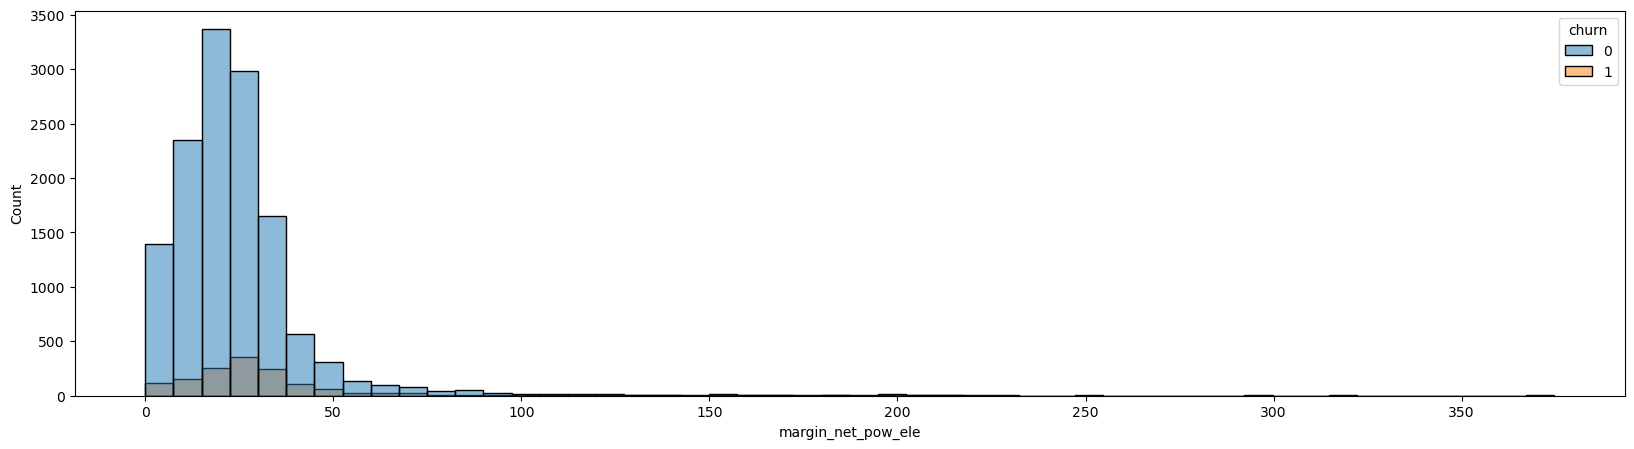

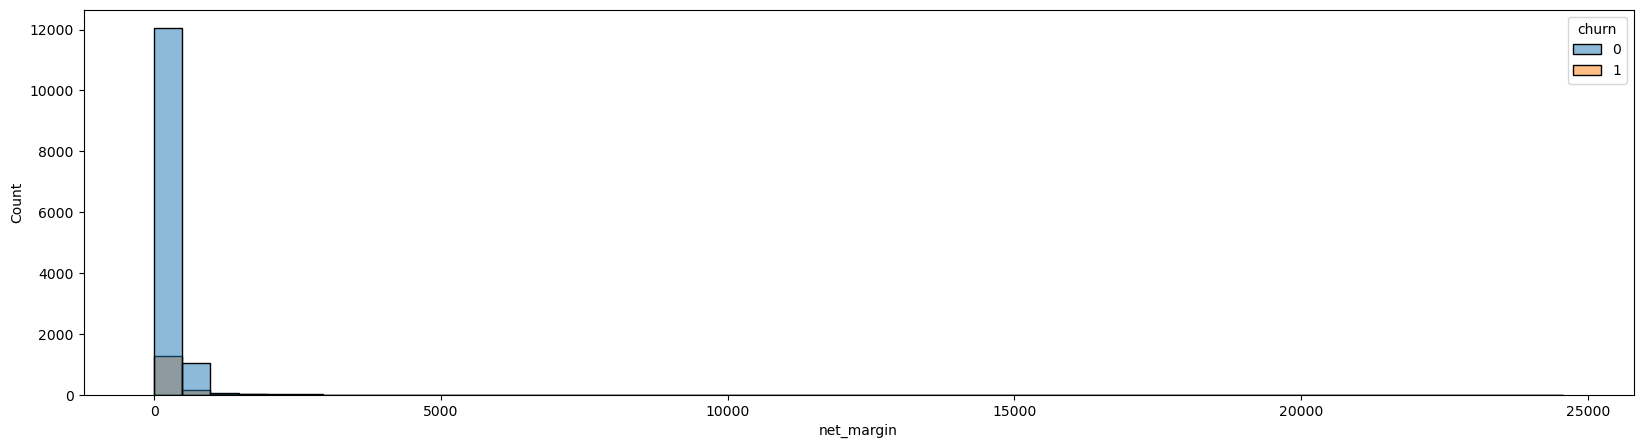

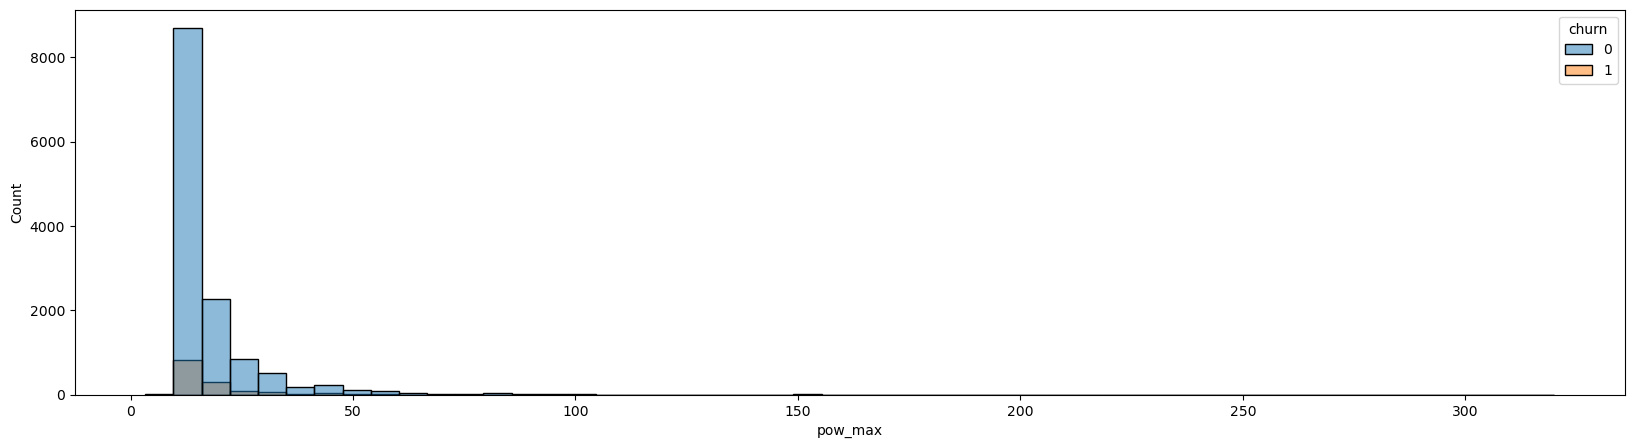

In [272]:
for attr in ['imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele','net_margin','pow_max',]:
    plot_histogram_by_churn(df=client_df, target_variable=attr)

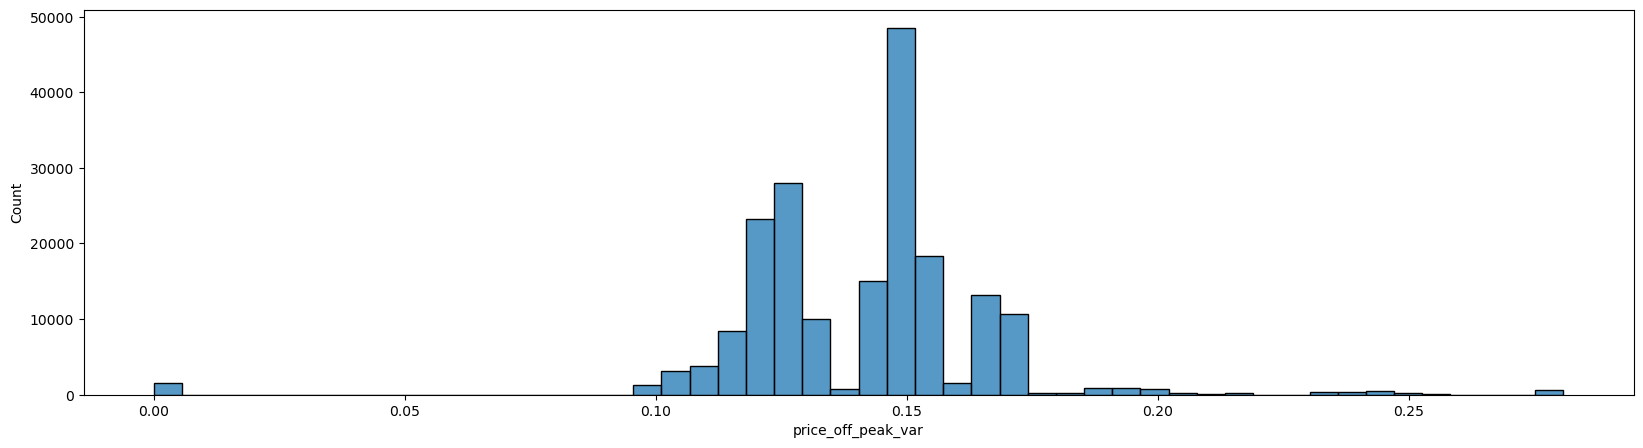

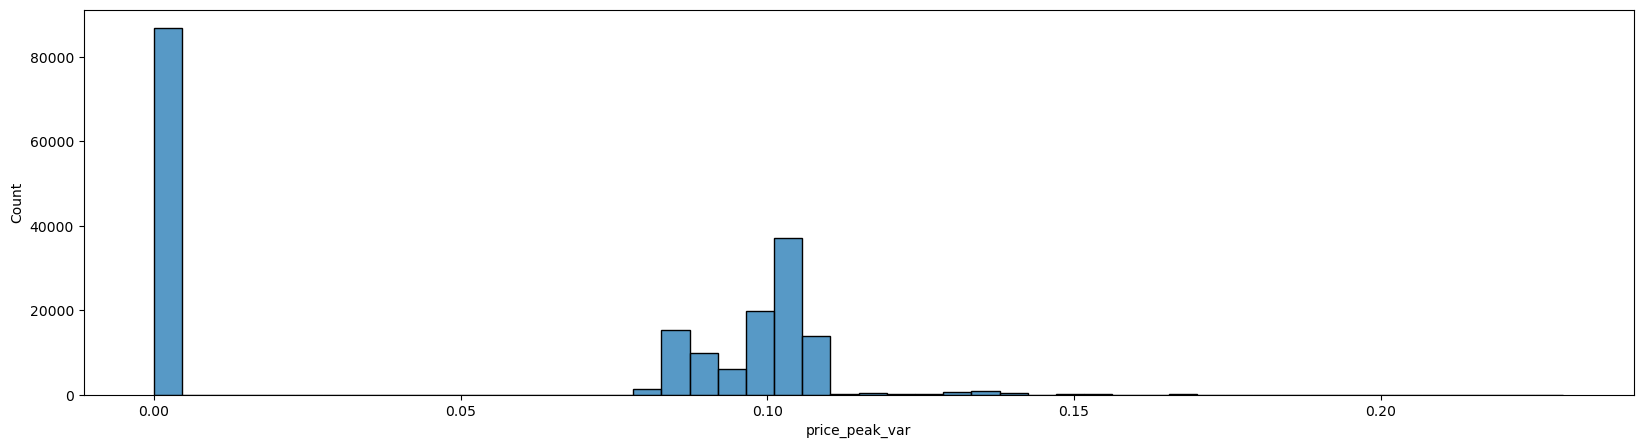

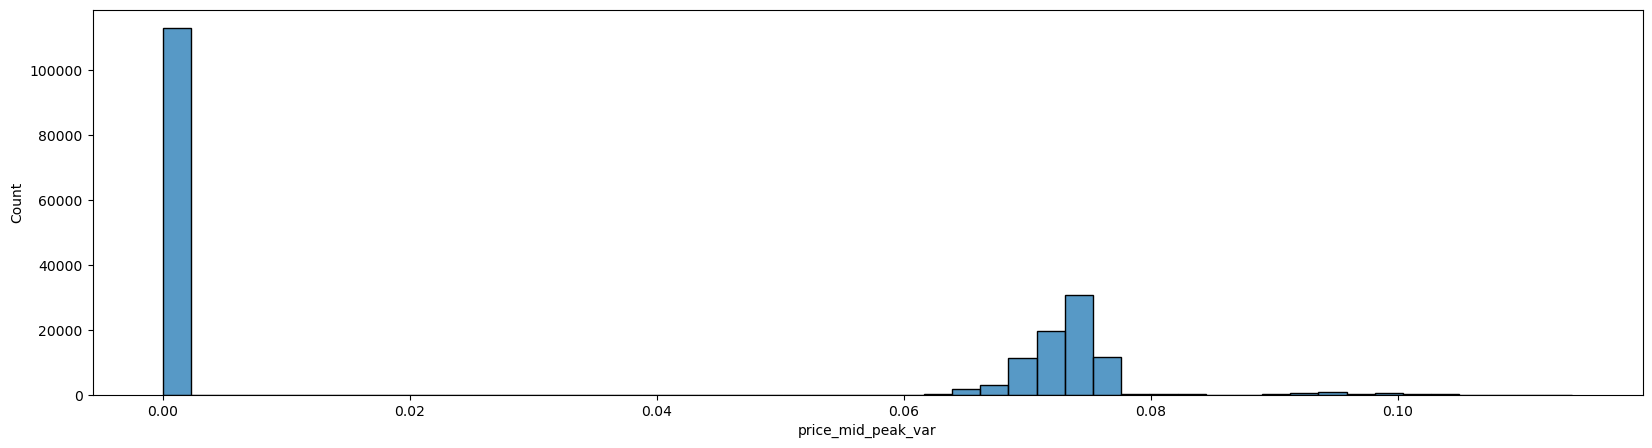

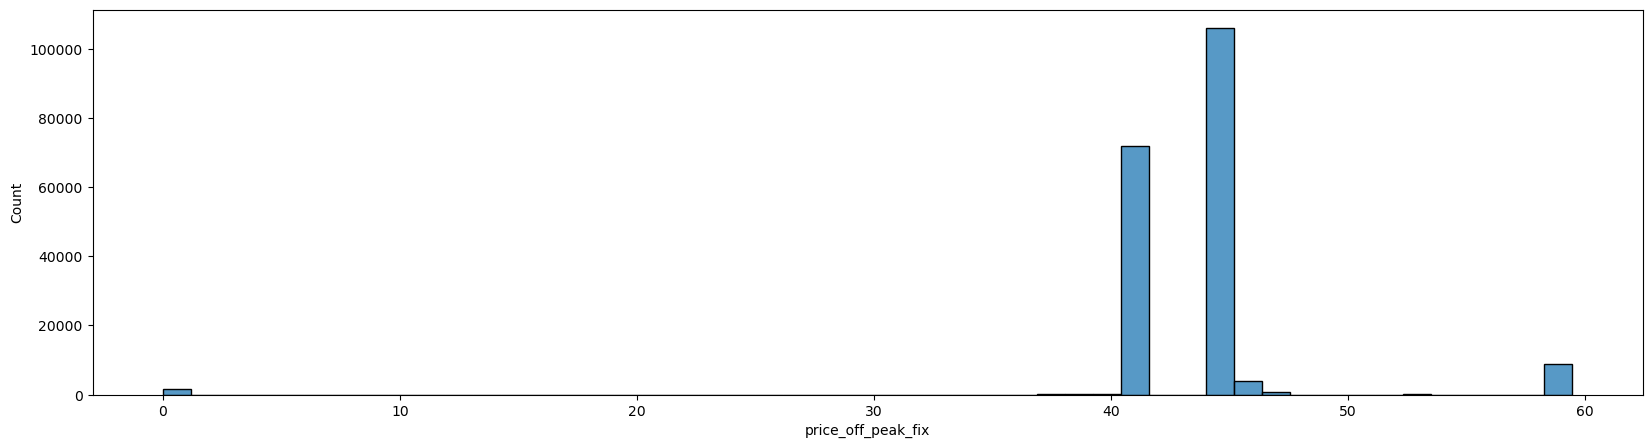

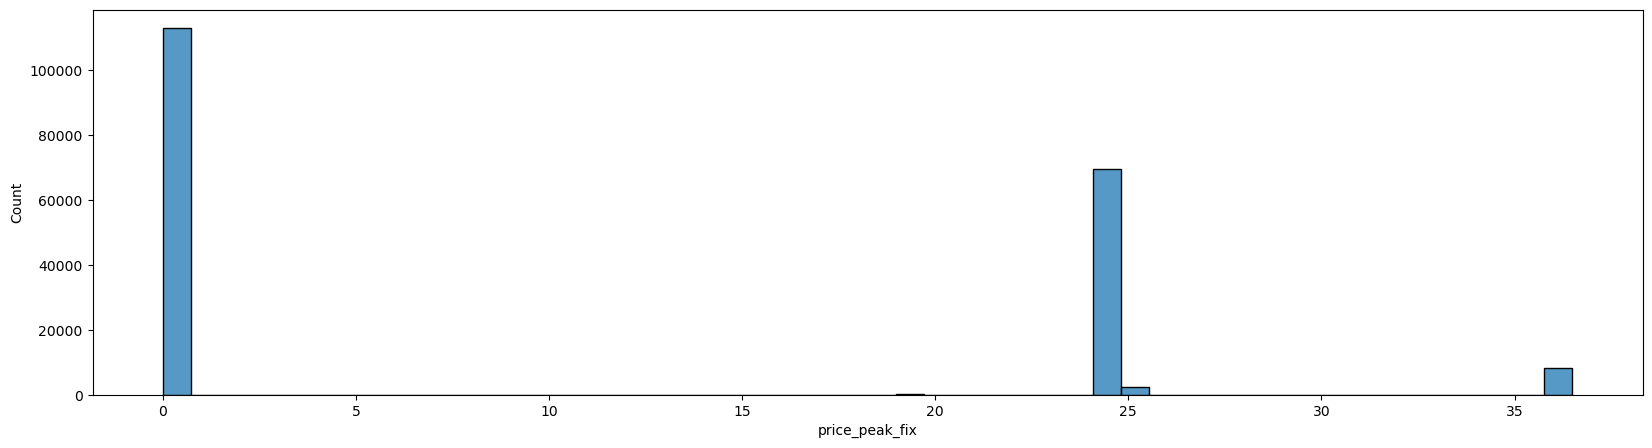

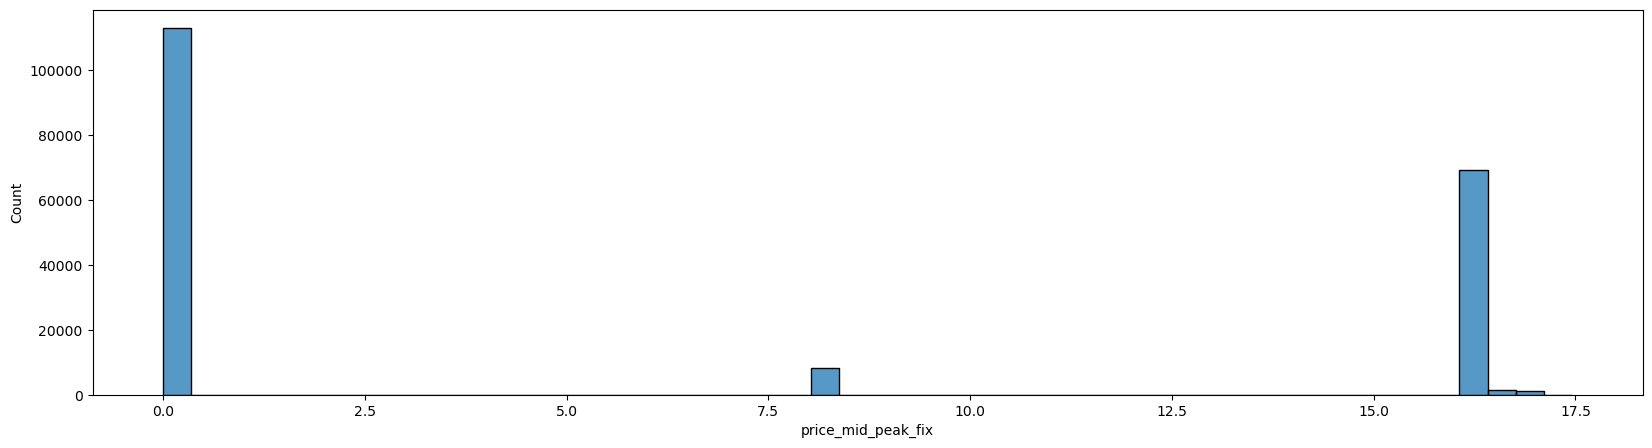

In [273]:
for attr in ['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']:
    plot_histogram_by_churn(df=price_df, target_variable=attr, if_churn=False)

In [274]:
#Sub-Task 2
#Now, let's check customers sensitivity to price

In [275]:
stat1_ = ['max', 'min', 'mean']
price_attr1 = ['price_off_peak_var','price_peak_var','price_mid_peak_var','price_off_peak_fix','price_peak_fix','price_mid_peak_fix']
price_stat1 = price_df.drop(columns=['price_date']).groupby(['id']).agg({'price_off_peak_var': stat1_, 'price_peak_var': stat1_, 'price_mid_peak_var': stat1_,
                                                      'price_off_peak_fix': stat1_, 'price_peak_fix': stat1_, 'price_mid_peak_fix': stat1_,})

In [276]:
price_stat1.columns.get_level_values(0)

Index(['price_off_peak_var', 'price_off_peak_var', 'price_off_peak_var',
       'price_peak_var', 'price_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_mid_peak_var', 'price_mid_peak_var',
       'price_off_peak_fix', 'price_off_peak_fix', 'price_off_peak_fix',
       'price_peak_fix', 'price_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix', 'price_mid_peak_fix', 'price_mid_peak_fix'],
      dtype='object')

In [277]:
price_stat1.columns.get_level_values(1)

Index(['max', 'min', 'mean', 'max', 'min', 'mean', 'max', 'min', 'mean', 'max',
       'min', 'mean', 'max', 'min', 'mean', 'max', 'min', 'mean'],
      dtype='object')

In [278]:
price_stat1

price_off_peak_var                      \
                                                max       min      mean   
id                                                                        
0002203ffbb812588b632b9e628cc38d           0.128067  0.119906  0.124338   
0004351ebdd665e6ee664792efc4fd13           0.148405  0.143943  0.146426   
0010bcc39e42b3c2131ed2ce55246e3c           0.205742  0.150837  0.181558   
0010ee3855fdea87602a5b7aba8e42de           0.123086  0.113068  0.118757   
00114d74e963e47177db89bc70108537           0.149902  0.145440  0.147926   
...                                             ...       ...       ...   
ffef185810e44254c3a4c6395e6b4d8a           0.165037  0.112488  0.138863   
fffac626da707b1b5ab11e8431a4d0a2           0.148825  0.144363  0.147137   
fffc0cacd305dd51f316424bbb08d1bd           0.159560  0.151399  0.153879   
fffe4f5646aa39c7f97f95ae2679ce64           0.127566  0.118175  0.123858   
ffff7fa066f1fb305ae285bb03bf325a           0.129444  0.119916  0.125360   

                                 price_peak_var                      \
                                            max       min      mean   
id                                                                    
0002203ffbb812588b632b9e628cc38d       0.105842  0.101673  0.103794   
0004351ebdd665e6ee664792efc4fd13       0.000000  0.000000  0.000000   
0010bcc39e42b3c2131ed2ce55246e3c       0.000000  0.000000  0.000000   
0010ee3855fdea87602a5b7aba8e42de       0.100505  0.095385  0.098292   
00114d74e963e47177db89bc70108537       0.000000  0.000000  0.000000   
...                                         ...       ...       ...   
ffef185810e44254c3a4c6395e6b4d8a       0.135909  0.094804  0.115125   
fffac626da707b1b5ab11e8431a4d0a2       0.000000  0.000000  0.000000   
fffc0cacd305dd51f316424bbb08d1bd       0.132895  0.126871  0.129497   
fffe4f5646aa39c7f97f95ae2679ce64       0.105428  0.100491  0.103499   
ffff7fa066f1fb305ae285bb03bf325a       0.106863  0.102232  0.104895   

                                 price_mid_peak_var                      \
                                                max       min      mean   
id                                                                        
0002203ffbb812588b632b9e628cc38d           0.073773  0.070232  0.073160   
0004351ebdd665e6ee664792efc4fd13           0.000000  0.000000  0.000000   
0010bcc39e42b3c2131ed2ce55246e3c           0.000000  0.000000  0.000000   
0010ee3855fdea87602a5b7aba8e42de           0.069463  0.068646  0.069032   
00114d74e963e47177db89bc70108537           0.000000  0.000000  0.000000   
...                                             ...       ...       ...   
ffef185810e44254c3a4c6395e6b4d8a           0.093881  0.068829  0.080780   
fffac626da707b1b5ab11e8431a4d0a2           0.000000  0.000000  0.000000   
fffc0cacd305dd51f316424bbb08d1bd           0.101037  0.091394  0.094842   
fffe4f5646aa39c7f97f95ae2679ce64           0.074516  0.073433  0.073735   
ffff7fa066f1fb305ae285bb03bf325a           0.076311  0.075004  0.075635   

                                 price_off_peak_fix                        \
                                                max        min       mean   
id                                                                          
0002203ffbb812588b632b9e628cc38d          40.728885  40.565969  40.701732   
0004351ebdd665e6ee664792efc4fd13          44.444710  44.266931  44.385450   
0010bcc39e42b3c2131ed2ce55246e3c          45.944710  44.444710  45.319710   
0010ee3855fdea87602a5b7aba8e42de          40.728885  40.565969  40.647427   
00114d74e963e47177db89bc70108537          44.266931  44.266930  44.266930   
...                                             ...        ...        ...   
ffef185810e44254c3a4c6395e6b4d8a          41.063970  40.728885  40.896427   
fffac626da707b1b5ab11e8431a4d0a2          44.444710  44.266930  44.311375   
fffc0cacd305dd51f316424bbb08d1bd          41.228885  41.063970  41.160171   
fffe4f5646aa

In [279]:
for x in zip(price_stat1.columns.get_level_values(0), price_stat1.columns.get_level_values(1)):
    print(x)

('price_off_peak_var', 'max')
('price_off_peak_var', 'min')
('price_off_peak_var', 'mean')
('price_peak_var', 'max')
('price_peak_var', 'min')
('price_peak_var', 'mean')
('price_mid_peak_var', 'max')
('price_mid_peak_var', 'min')
('price_mid_peak_var', 'mean')
('price_off_peak_fix', 'max')
('price_off_peak_fix', 'min')
('price_off_peak_fix', 'mean')
('price_peak_fix', 'max')
('price_peak_fix', 'min')
('price_peak_fix', 'mean')
('price_mid_peak_fix', 'max')
('price_mid_peak_fix', 'min')
('price_mid_peak_fix', 'mean')


In [280]:
stat_ = ['max', 'min', 'mean']
price_attr = ['price_off_peak_var','price_peak_var','price_mid_peak_var','price_off_peak_fix','price_peak_fix','price_mid_peak_fix']
price_stat = price_df.drop(columns=['price_date']).groupby(['id']).agg({'price_off_peak_var': stat_, 'price_peak_var': stat_, 'price_mid_peak_var': stat_,
                                                      'price_off_peak_fix': stat_, 'price_peak_fix': stat_, 'price_mid_peak_fix': stat_,})
# flatten the column names
price_stat.columns = ['_'.join(x) for x in zip(price_stat.columns.get_level_values(0), price_stat.columns.get_level_values(1))]
price_stat = price_stat.reset_index()
price_stat.head(3)

,id,price_off_peak_var_max,price_off_peak_var_min,price_off_peak_var_mean,price_peak_var_max,price_peak_var_min,price_peak_var_mean,price_mid_peak_var_max,price_mid_peak_var_min,price_mid_peak_var_mean,price_off_peak_fix_max,price_off_peak_fix_min,price_off_peak_fix_mean,price_peak_fix_max,price_peak_fix_min,price_peak_fix_mean,price_mid_peak_fix_max,price_mid_peak_fix_min,price_mid_peak_fix_mean
0,0002203ffbb812588b632b9e628cc38d,0.128067,0.119906,0.124338,0.105842,0.101673,0.103794,0.073773,0.070232,0.07316,40.728885,40.565969,40.701732,24.43733,24.339581,24.421038,16.291555,16.226389,16.280694
1,0004351ebdd665e6ee664792efc4fd13,0.148405,0.143943,0.146426,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,44.444710,44.266931,44.385450,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.205742,0.150837,0.181558,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,45.944710,44.444710,45.319710,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


In [281]:
#Merge client data with price along churn

## add churn values
price_stat=price_stat.merge(client_df[['id','churn']], on=['id'], how='left')
##drop ids that are not inclued in the price dataset
price_stat = price_stat.dropna(subset='churn').reset_index(drop=True)
price_stat.head()

,id,price_off_peak_var_max,price_off_peak_var_min,price_off_peak_var_mean,price_peak_var_max,price_peak_var_min,price_peak_var_mean,price_mid_peak_var_max,price_mid_peak_var_min,price_mid_peak_var_mean,price_off_peak_fix_max,price_off_peak_fix_min,price_off_peak_fix_mean,price_peak_fix_max,price_peak_fix_min,price_peak_fix_mean,price_mid_peak_fix_max,price_mid_peak_fix_min,price_mid_peak_fix_mean,churn
0,0002203ffbb812588b632b9e628cc38d,0.128067,0.119906,0.124338,0.105842,0.101673,0.103794,0.073773,0.070232,0.073160,40.728885,40.565969,40.701732,24.43733,24.339581,24.421038,16.291555,16.226389,16.280694,0.0
1,0004351ebdd665e6ee664792efc4fd13,0.148405,0.143943,0.146426,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.444710,44.266931,44.385450,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.205742,0.150837,0.181558,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.944710,44.444710,45.319710,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,00114d74e963e47177db89bc70108537,0.149902,0.145440,0.147926,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.266931,44.266930,44.266930,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0013f326a839a2f6ad87a1859952d227,0.129808,0.121647,0.126076,0.107582,0.103413,0.105542,0.075514,0.072089,0.074921,40.728885,40.728885,40.728885,24.43733,24.437330,24.437330,16.291555,16.291555,16.291555,0.0


In [282]:
for attr in price_attr:
    price_stat[f'diff_max_min_{attr}'] = price_stat[f'{attr}_max']-price_stat[f'{attr}_min']
price_stat.head()
#Most customers' prices did not change much and kept stable.

,id,price_off_peak_var_max,price_off_peak_var_min,price_off_peak_var_mean,price_peak_var_max,price_peak_var_min,price_peak_var_mean,price_mid_peak_var_max,price_mid_peak_var_min,price_mid_peak_var_mean,...,price_mid_peak_fix_max,price_mid_peak_fix_min,price_mid_peak_fix_mean,churn,diff_max_min_price_off_peak_var,diff_max_min_price_peak_var,diff_max_min_price_mid_peak_var,diff_max_min_price_off_peak_fix,diff_max_min_price_peak_fix,diff_max_min_price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.128067,0.119906,0.124338,0.105842,0.101673,0.103794,0.073773,0.070232,0.073160,...,16.291555,16.226389,16.280694,0.0,0.008161,0.004169,0.003541,0.162916,0.097749,0.065166
1,0004351ebdd665e6ee664792efc4fd13,0.148405,0.143943,0.146426,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.004462,0.000000,0.000000,0.177779,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.205742,0.150837,0.181558,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.054905,0.000000,0.000000,1.500000,0.000000,0.000000
3,00114d74e963e47177db89bc70108537,0.149902,0.145440,0.147926,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.004462,0.000000,0.000000,0.000001,0.000000,0.000000
4,0013f326a839a2f6ad87a1859952d227,0.129808,0.121647,0.126076,0.107582,0.103413,0.105542,0.075514,0.072089,0.074921,...,16.291555,16.291555,16.291555,0.0,0.008161,0.004169,0.003425,0.000000,0.000000,0.000000


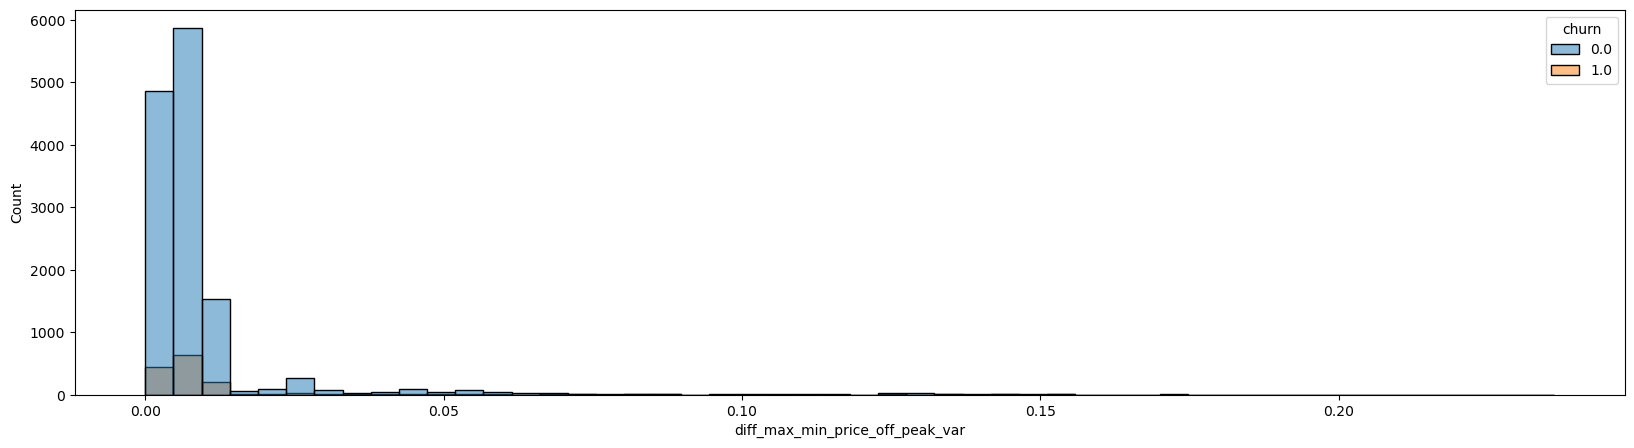

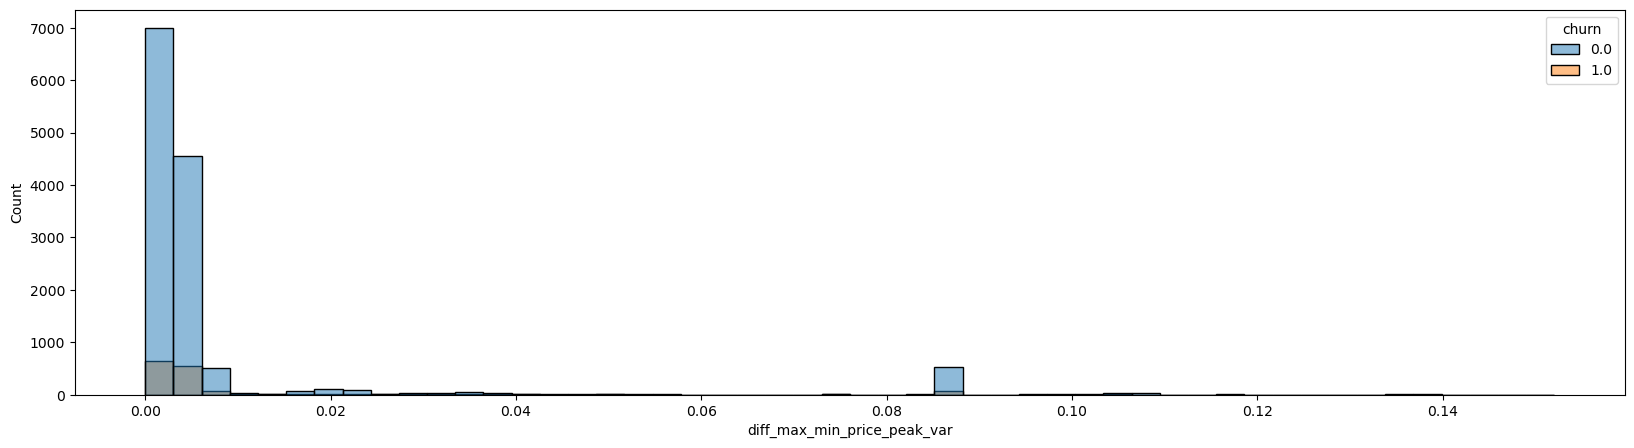

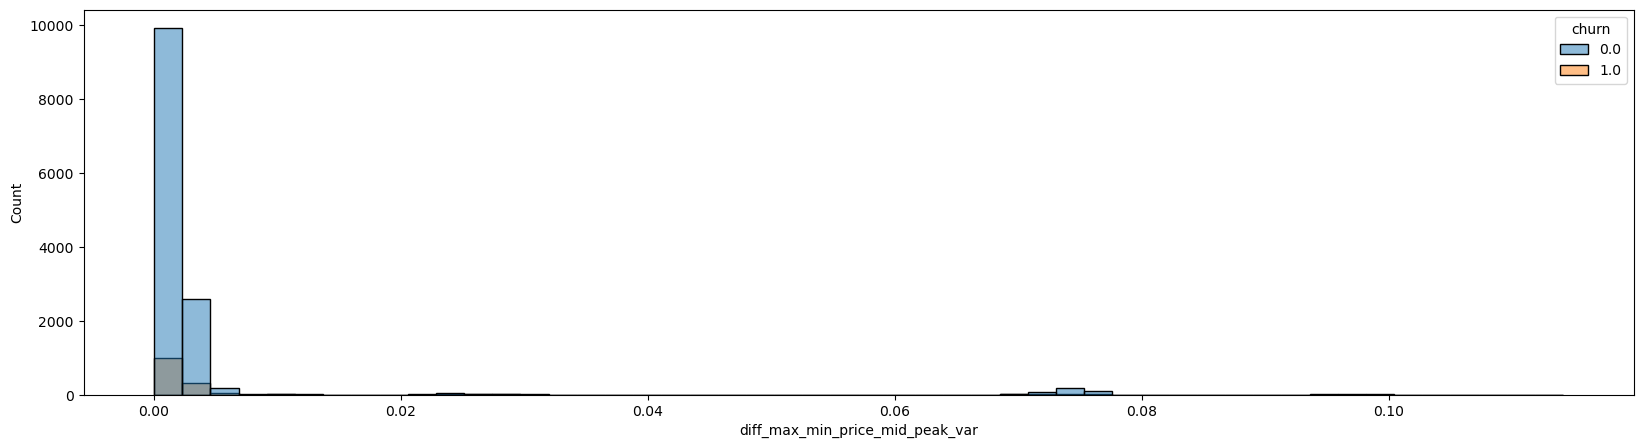

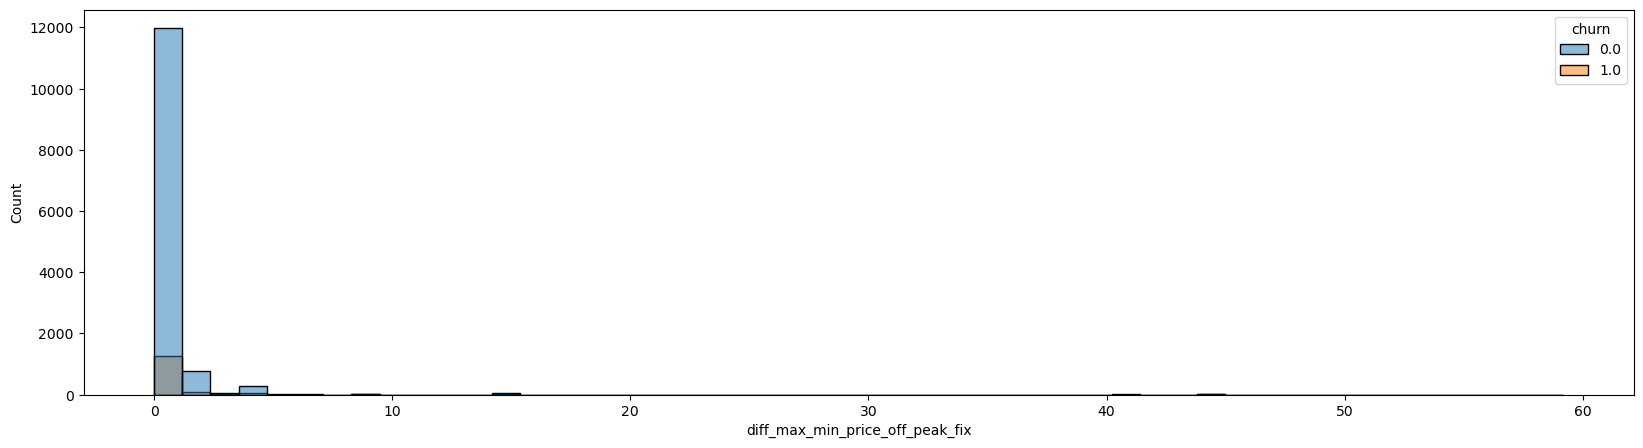

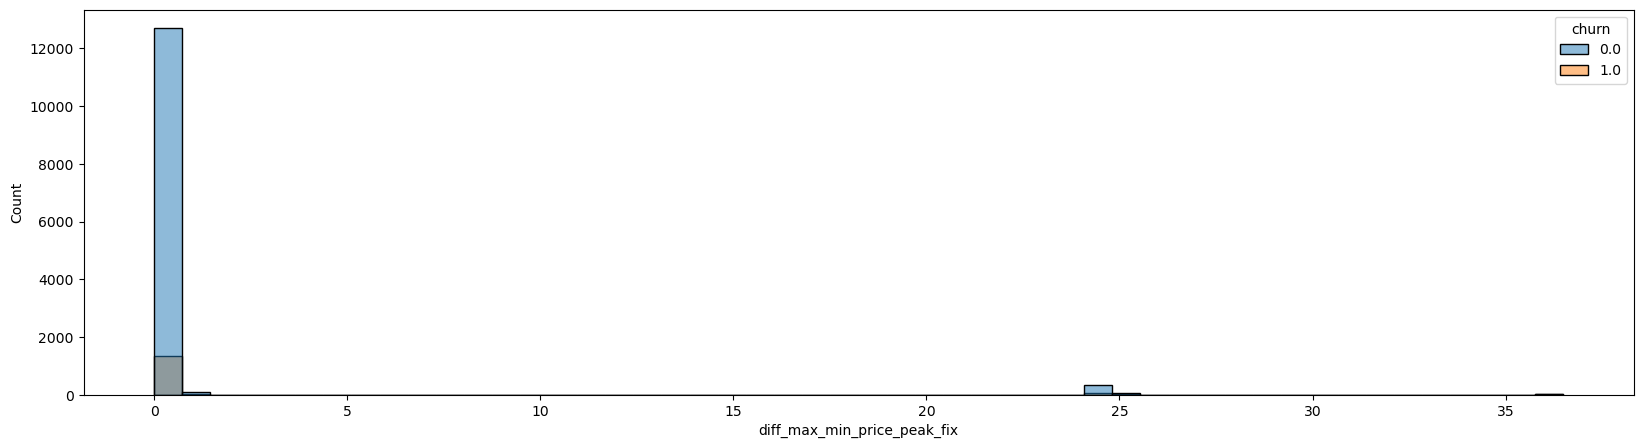

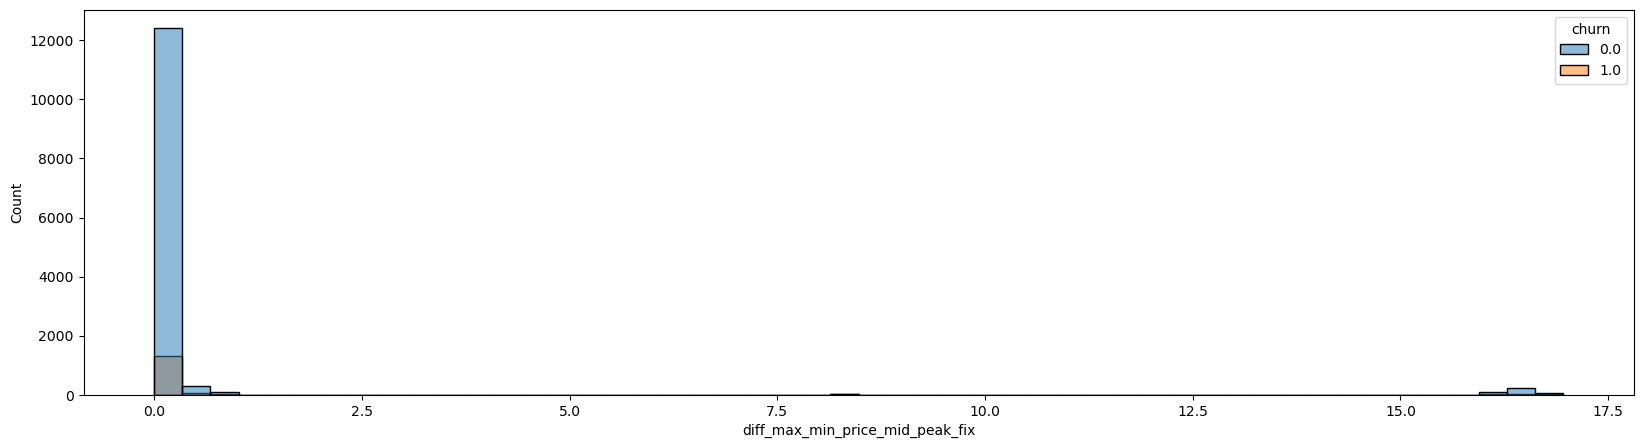

In [283]:
for attr in price_attr:
    plot_histogram_by_churn(df=price_stat, target_variable=f'diff_max_min_{attr}', if_churn=True)

In [284]:
#Calculate the difference between the price last month (2015-12-01) and mean price

## add diff
for attr in price_attr:
    price_stat[f'diff_Dec_mean_{attr}'] = price_df[price_df['id'].isin(price_stat['id'])].groupby(['id'])[attr].nth(-1).values - price_stat[f'{attr}_mean']
#
price_stat.head(3)

#Most customers' prices last month were very close to the mean prices over the whole year.

,id,price_off_peak_var_max,price_off_peak_var_min,price_off_peak_var_mean,price_peak_var_max,price_peak_var_min,price_peak_var_mean,price_mid_peak_var_max,price_mid_peak_var_min,price_mid_peak_var_mean,...,diff_max_min_price_mid_peak_var,diff_max_min_price_off_peak_fix,diff_max_min_price_peak_fix,diff_max_min_price_mid_peak_fix,diff_Dec_mean_price_off_peak_var,diff_Dec_mean_price_peak_var,diff_Dec_mean_price_mid_peak_var,diff_Dec_mean_price_off_peak_fix,diff_Dec_mean_price_peak_fix,diff_Dec_mean_price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.128067,0.119906,0.124338,0.105842,0.101673,0.103794,0.073773,0.070232,0.07316,...,0.003541,0.162916,0.097749,0.065166,0.021521,-0.103794,-0.073160,3.742978,-24.421038,-16.280694
1,0004351ebdd665e6ee664792efc4fd13,0.148405,0.143943,0.146426,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.177779,0.000000,0.000000,-0.027671,0.101071,0.075096,-3.656565,24.437330,16.291555
2,0010bcc39e42b3c2131ed2ce55246e3c,0.205742,0.150837,0.181558,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,1.500000,0.000000,0.000000,-0.037615,0.000000,0.000000,-0.875000,0.000000,0.000000


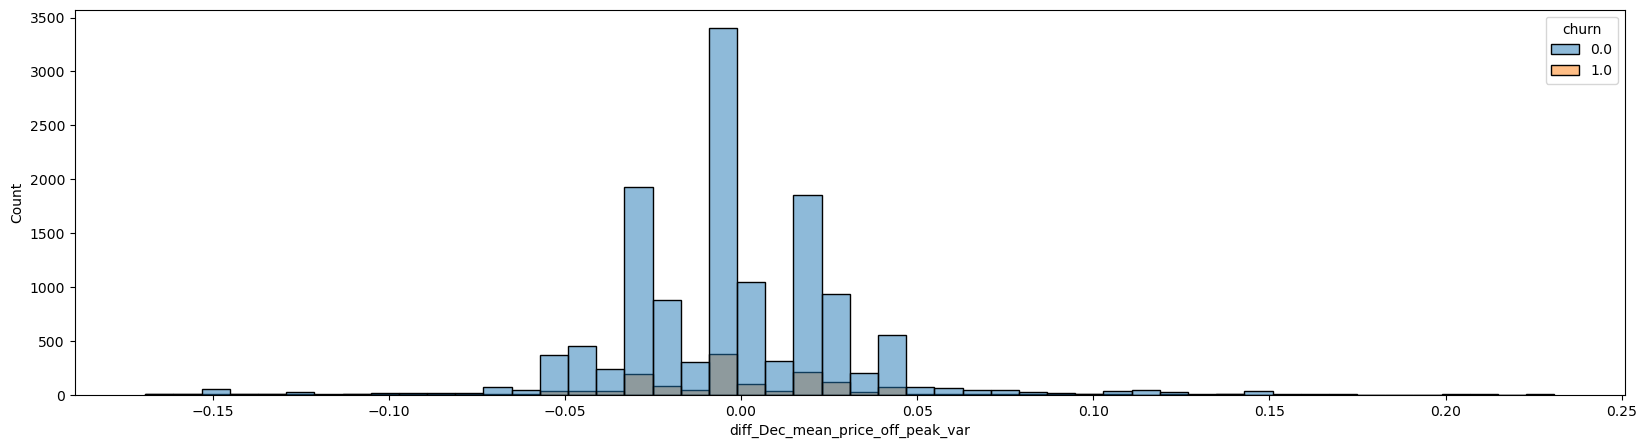

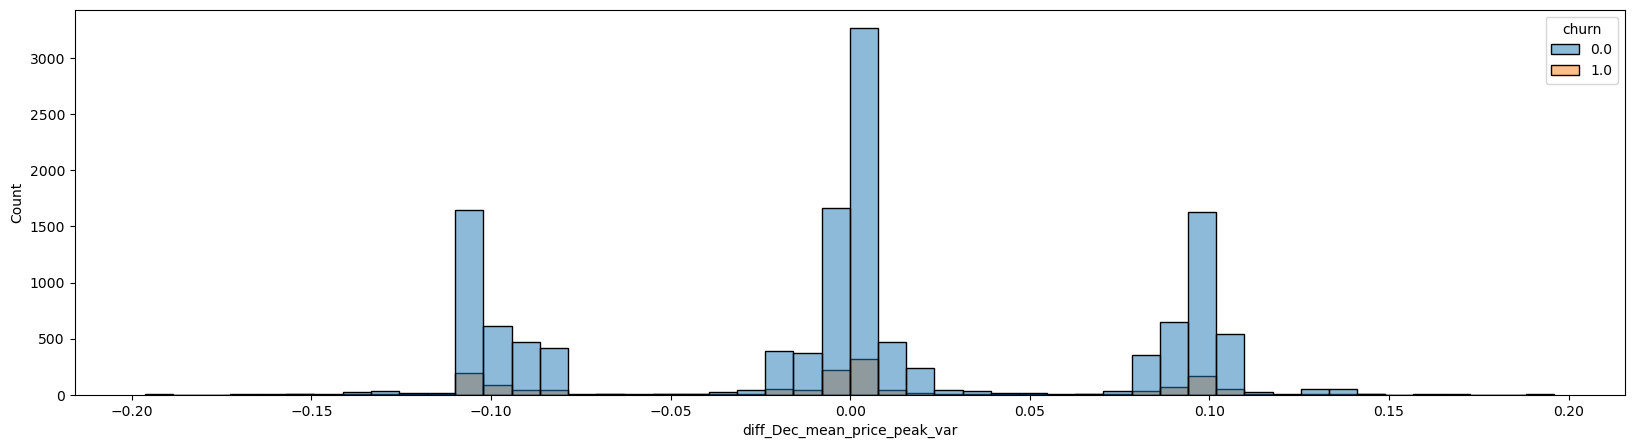

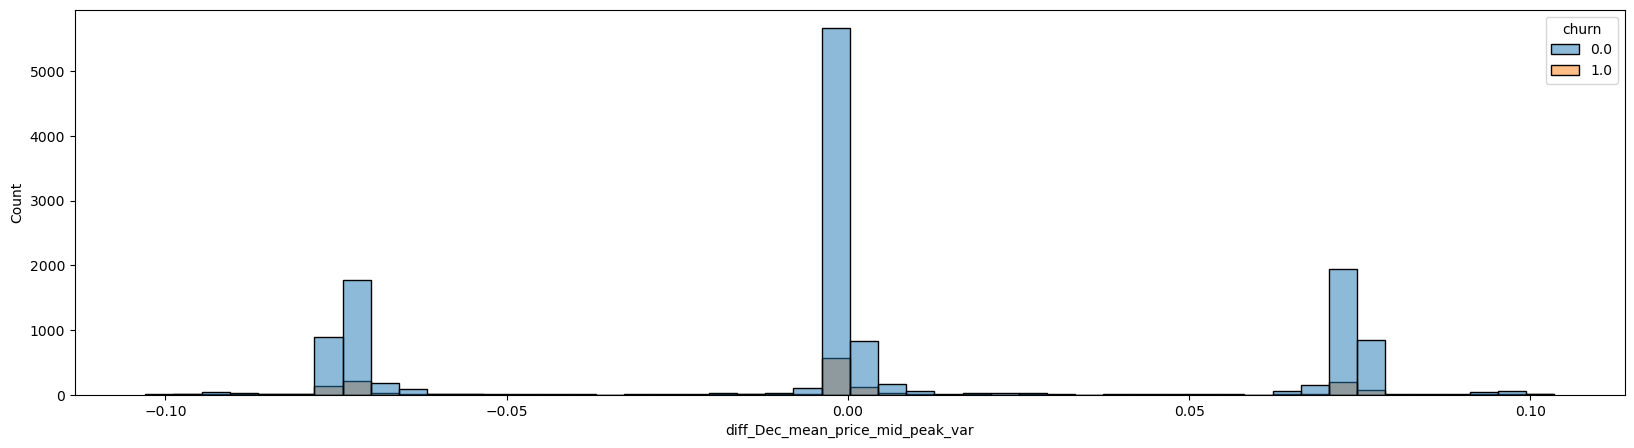

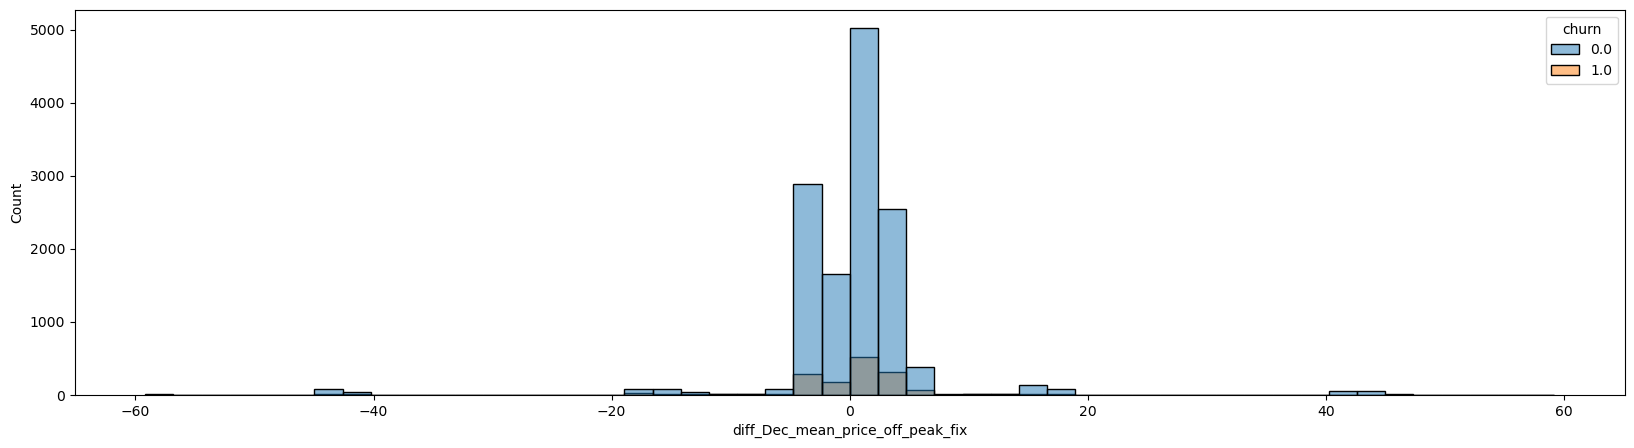

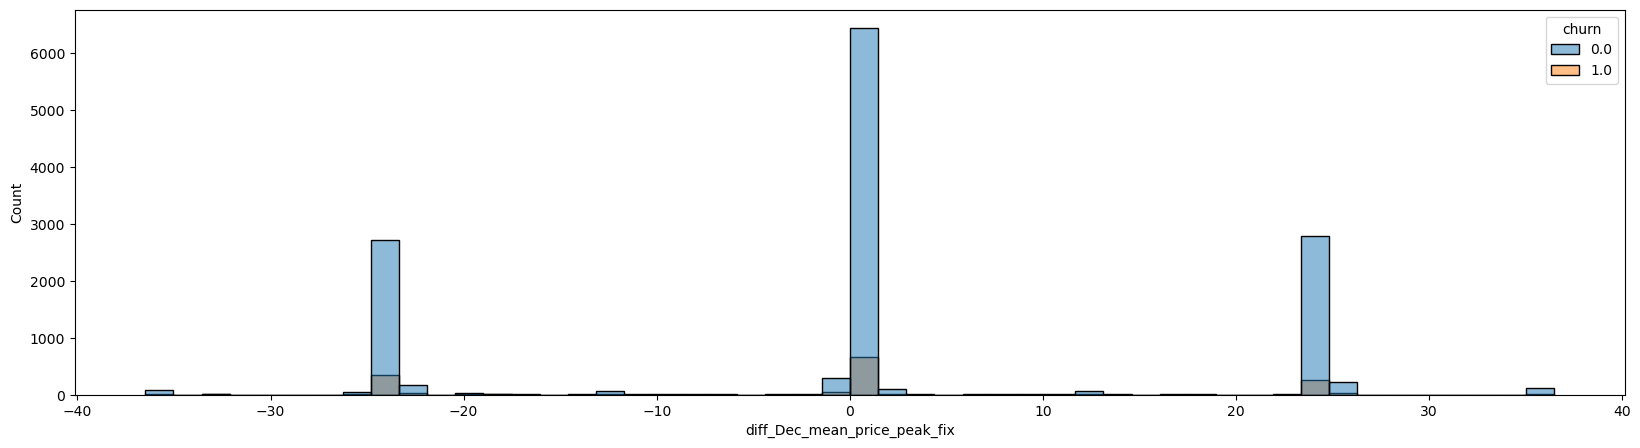

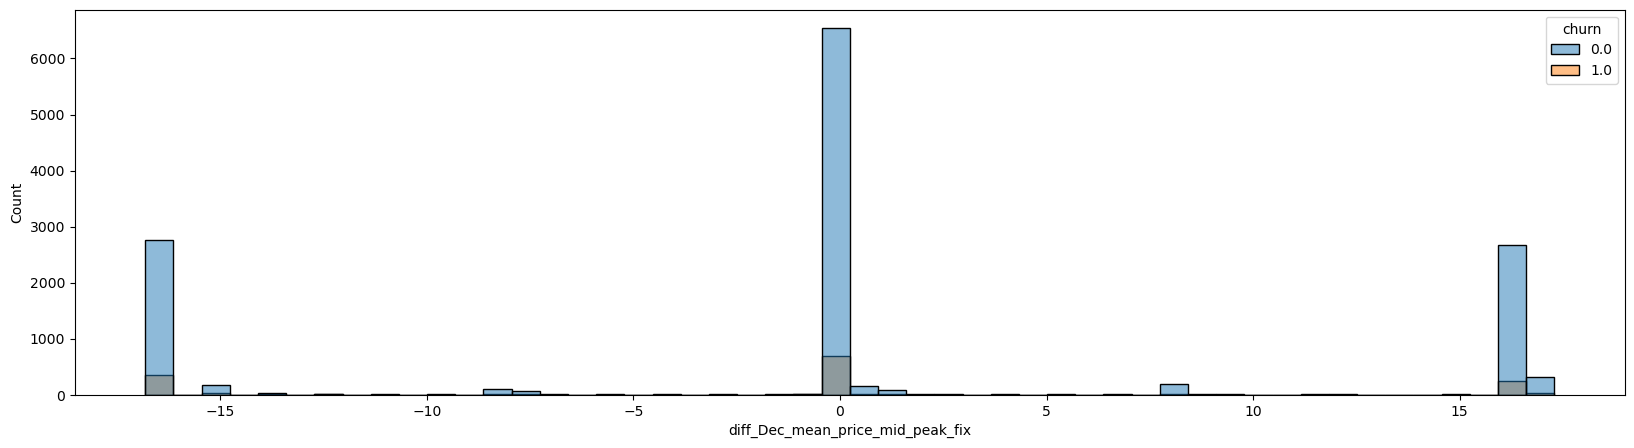

In [285]:
for attr in price_attr:
    plot_histogram_by_churn(df=price_stat, target_variable=f'diff_Dec_mean_{attr}', if_churn=True)

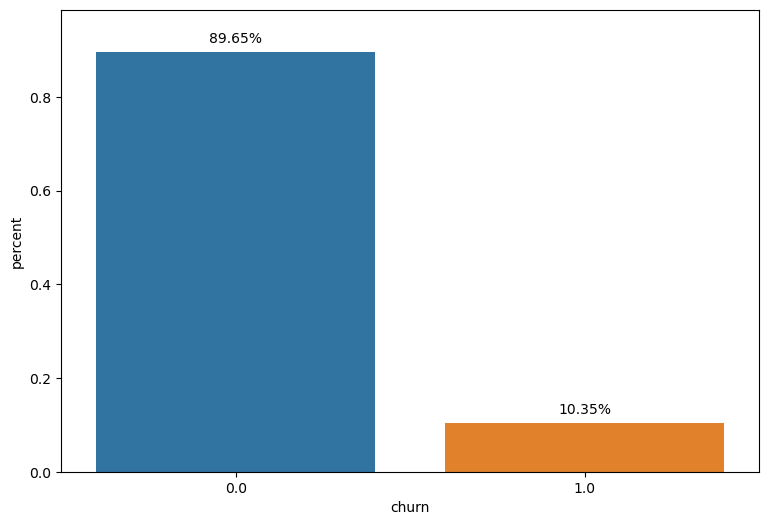

In [286]:
#Check whether changes in prices would affect customer churn (only considering off peak prices)

##Among the customers whose off-peak energy prices increased, around 10.35% of customers changed their providers.
plot_bar_chart_with_percent_label(df=price_stat[price_stat['diff_Dec_mean_price_off_peak_var']>0], target_variable='churn', gap_label_bar=0.02)

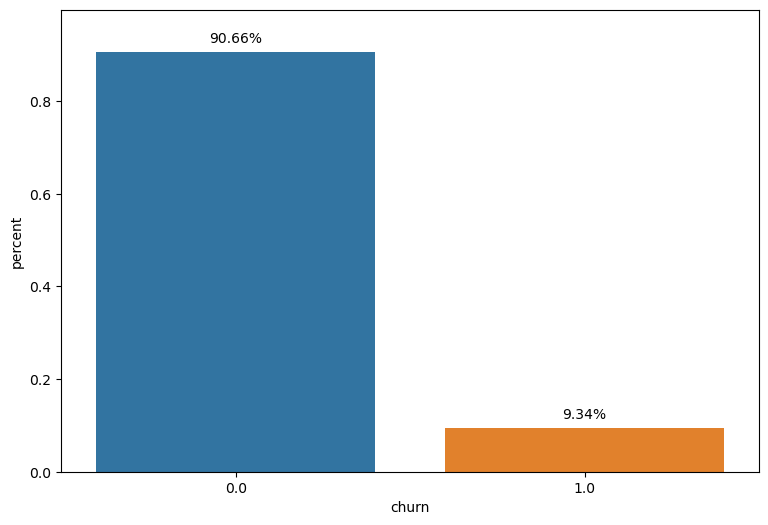

In [287]:
#Among the cutomers whose off-peak energy prices did not increase (decreased or did not change), 9.34% of customers changed their providers.

plot_bar_chart_with_percent_label(df=price_stat[price_stat['diff_Dec_mean_price_off_peak_var']<=0], target_variable='churn', gap_label_bar=0.02)

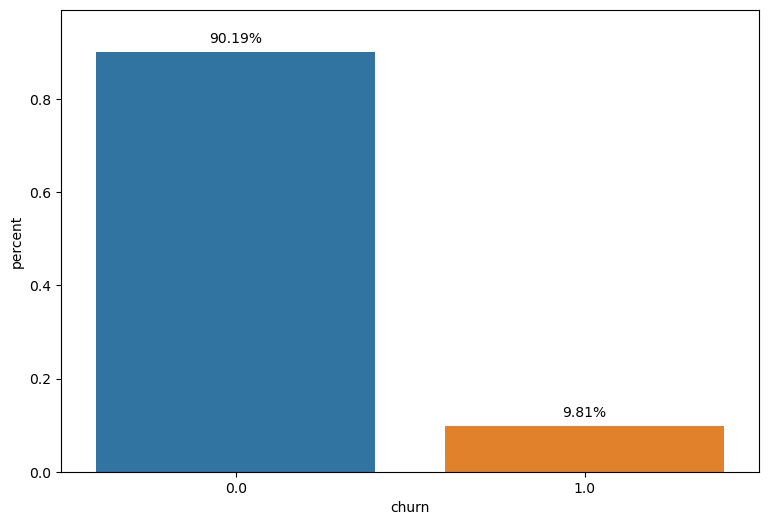

In [288]:
###Among the customers whose off-peak power prices increased, around 9.81% of customers changed their providers.
plot_bar_chart_with_percent_label(df=price_stat[price_stat['diff_Dec_mean_price_off_peak_fix']>0], target_variable='churn', gap_label_bar=0.02)

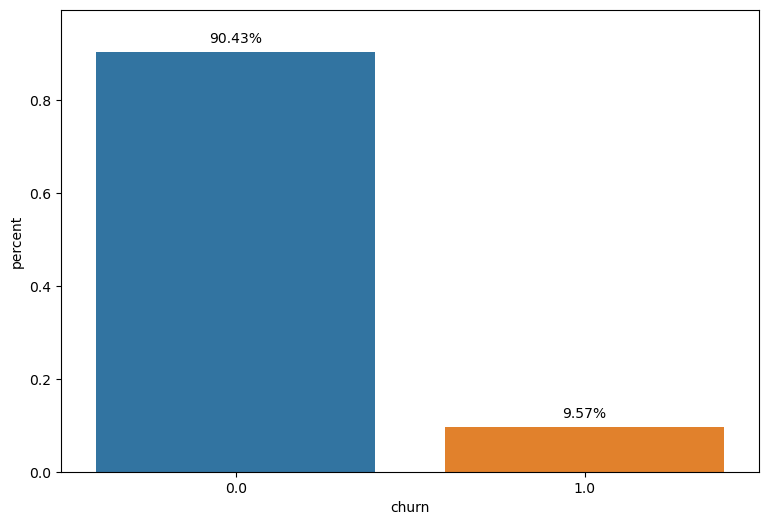

In [289]:
#Among the customers whose off-peak power prices did not increase (decreased or did not change), 9.57% of customers changed their providers.

plot_bar_chart_with_percent_label(df=price_stat[price_stat['diff_Dec_mean_price_off_peak_fix']<=0], target_variable='churn', gap_label_bar=0.02)

In [290]:
#Thus change in price, affects the churn rate; i.e decrease in price less churn; increase in price, more churn

In [291]:
price_df

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
...,...,...,...,...,...,...,...,...
192997,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192998,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192999,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193000,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555


In [292]:
#6 month avg price vs dec price

price_stat_6_month=price_df[price_df['price_date']>'2015-06-01'].drop(columns=['price_date']).groupby('id').agg({'price_off_peak_var': stat_, 'price_off_peak_fix': stat_,})

## flatten the column names
price_stat_6_month.columns = ['_'.join(x) for x in zip(price_stat_6_month.columns.get_level_values(0),price_stat_6_month.columns.get_level_values(1))]
price_stat_6_month = price_stat_6_month.reset_index()

## add churn values
price_stat_6_month = price_stat_6_month.merge(client_df[['id','churn']], on=['id'], how='left')

## drop ids that are not inclued in the price dataset
price_stat_6_month = price_stat_6_month.dropna(subset='churn').reset_index(drop=True)

# add diff
for attr in ['price_off_peak_var','price_off_peak_fix']:
    price_stat_6_month[f'diff_Dec_mean_{attr}'] = price_df[price_df['id'].isin(price_stat_6_month['id'])].groupby(['id'])[attr].nth(-1).values - price_stat_6_month[f'{attr}_mean']
price_stat_6_month.head(5)

,id,price_off_peak_var_max,price_off_peak_var_min,price_off_peak_var_mean,price_off_peak_fix_max,price_off_peak_fix_min,price_off_peak_fix_mean,churn,diff_Dec_mean_price_off_peak_var,diff_Dec_mean_price_off_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.128067,0.119906,0.121266,40.728885,40.728885,40.728885,0.0,0.024593,3.715825
1,0004351ebdd665e6ee664792efc4fd13,0.148405,0.143943,0.144687,44.444710,44.444710,44.444710,0.0,-0.025932,-3.715825
2,0010bcc39e42b3c2131ed2ce55246e3c,0.205742,0.201280,0.202024,45.944710,45.944710,45.944710,0.0,-0.058081,-1.500000
3,00114d74e963e47177db89bc70108537,0.149902,0.145440,0.146184,44.266930,44.266930,44.266930,0.0,-0.028590,-3.538045
4,0013f326a839a2f6ad87a1859952d227,0.129808,0.121647,0.123007,40.728885,40.728885,40.728885,0.0,0.024593,3.715825


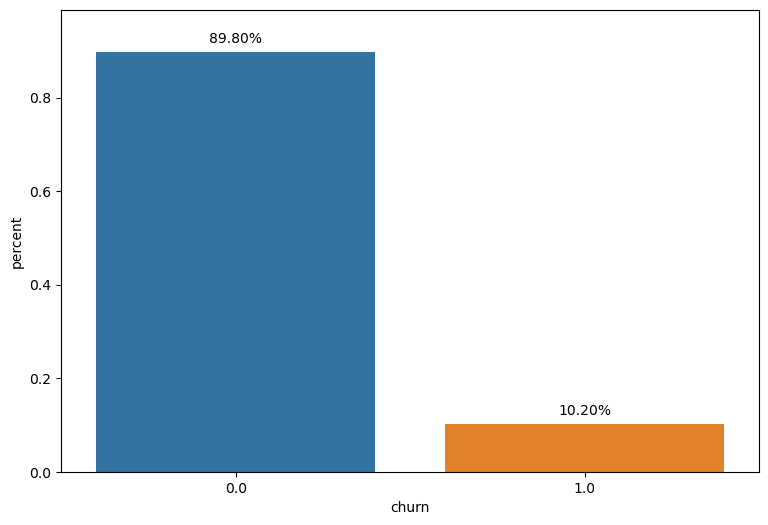

In [293]:
#Among the customers whose off-peak energy prices increased(last 6 mo avg), around 10.20% of customers changed their providers.
plot_bar_chart_with_percent_label(df=price_stat_6_month[price_stat_6_month['diff_Dec_mean_price_off_peak_var']>0], target_variable='churn', gap_label_bar=0.02)

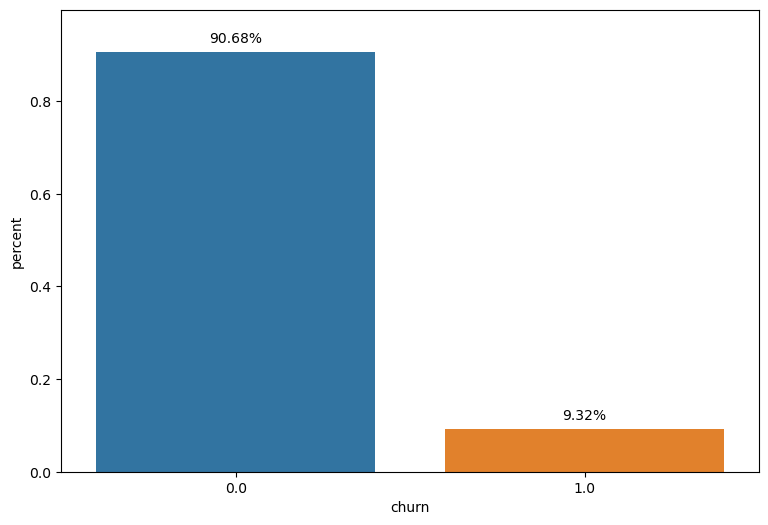

In [294]:
#Among the customers whose off-peak energy prices decreased or never changed(last 6 mo avg), around 9.32% of customers changed their providers.
plot_bar_chart_with_percent_label(df=price_stat_6_month[price_stat_6_month['diff_Dec_mean_price_off_peak_var']<=0], target_variable='churn', gap_label_bar=0.02)

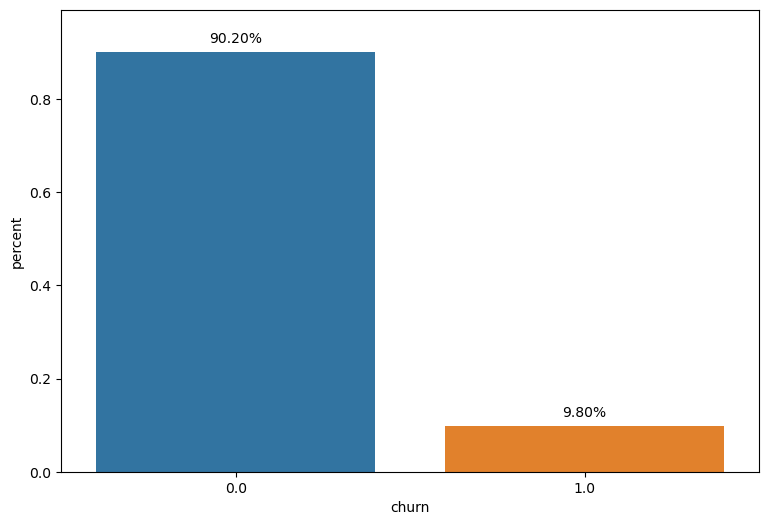

In [295]:
#Among the customers whose off-peak power prices increased(last 6 mo avg), around 9.80% of customers changed their providers.
plot_bar_chart_with_percent_label(df=price_stat_6_month[price_stat_6_month['diff_Dec_mean_price_off_peak_fix']>0], target_variable='churn', gap_label_bar=0.02)

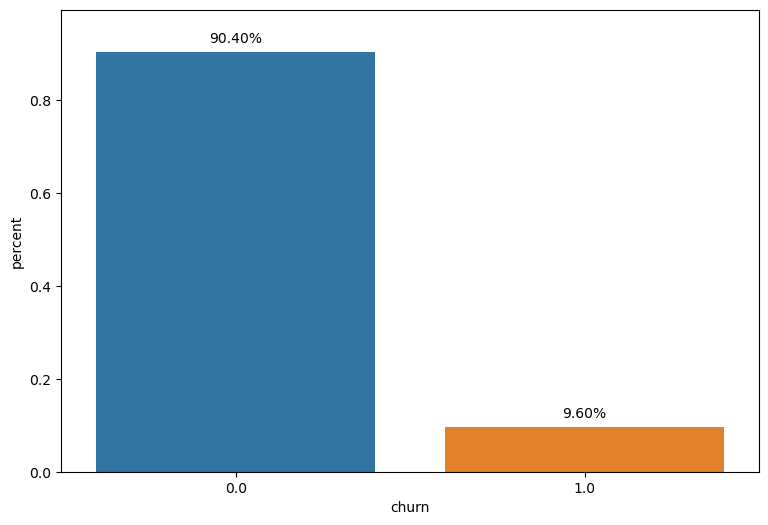

In [296]:
#Among the customers whose off-peak power prices decreased or never changed(last 6 mo avg), around 9.60% of customers changed their providers.
plot_bar_chart_with_percent_label(df=price_stat_6_month[price_stat_6_month['diff_Dec_mean_price_off_peak_fix']<=0], target_variable='churn', gap_label_bar=0.02)

In [297]:
# 3month avg vs dec
price_stat_3_month=price_df[price_df['price_date']>'2015-09-01'].drop(columns=['price_date']).groupby('id').agg({'price_off_peak_var': stat_, 'price_off_peak_fix': stat_,})

## flatten the column names
price_stat_3_month.columns = ['_'.join(x) for x in zip(price_stat_3_month.columns.get_level_values(0),price_stat_3_month.columns.get_level_values(1))]
price_stat_3_month = price_stat_3_month.reset_index()

## add churn values
price_stat_3_month = price_stat_3_month.merge(client_df[['id','churn']], on=['id'], how='left')

## drop ids that are not inclued in the price dataset
price_stat_3_month = price_stat_3_month.dropna(subset='churn').reset_index(drop=True)

# add diff
for attr in ['price_off_peak_var','price_off_peak_fix']:
    price_stat_3_month[f'diff_Dec_mean_{attr}'] = price_df[price_df['id'].isin(price_stat_3_month['id'])].groupby(['id'])[attr].nth(-1).values - price_stat_3_month[f'{attr}_mean']
price_stat_3_month.head(5)

,id,price_off_peak_var_max,price_off_peak_var_min,price_off_peak_var_mean,price_off_peak_fix_max,price_off_peak_fix_min,price_off_peak_fix_mean,churn,diff_Dec_mean_price_off_peak_var,diff_Dec_mean_price_off_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.119906,0.119906,0.119906,40.728885,40.728885,40.728885,0.0,0.025953,3.715825
1,0004351ebdd665e6ee664792efc4fd13,0.143943,0.143943,0.143943,44.444710,44.444710,44.444710,0.0,-0.025188,-3.715825
2,0010bcc39e42b3c2131ed2ce55246e3c,0.201280,0.201280,0.201280,45.944710,45.944710,45.944710,0.0,-0.057337,-1.500000
3,00114d74e963e47177db89bc70108537,0.145440,0.145440,0.145440,44.266930,44.266930,44.266930,0.0,-0.027846,-3.538045
4,0013f326a839a2f6ad87a1859952d227,0.121647,0.121647,0.121647,40.728885,40.728885,40.728885,0.0,0.025953,3.715825


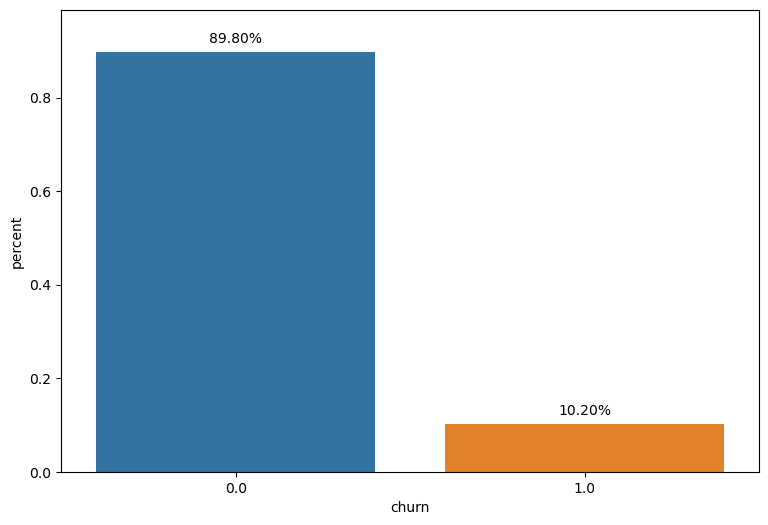

In [298]:
#Among the customers whose off-peak energy prices increased(last 3 mo avg), around 10.20% of customers changed their providers.
plot_bar_chart_with_percent_label(df=price_stat_3_month[price_stat_3_month['diff_Dec_mean_price_off_peak_var']>0], target_variable='churn', gap_label_bar=0.02)

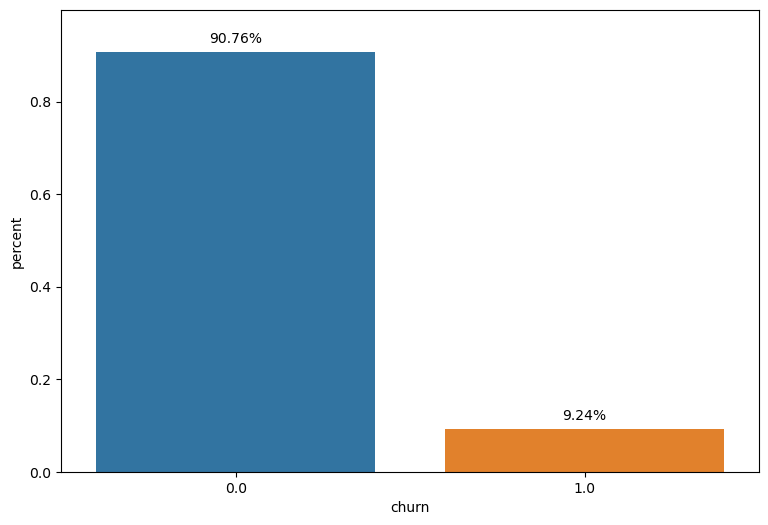

In [299]:
#Among the customers whose off-peak energy prices decreased or never changed(last 3 mo avg), around 9.24% of customers changed their providers.
plot_bar_chart_with_percent_label(df=price_stat_3_month[price_stat_3_month['diff_Dec_mean_price_off_peak_var']<=0], target_variable='churn', gap_label_bar=0.02)

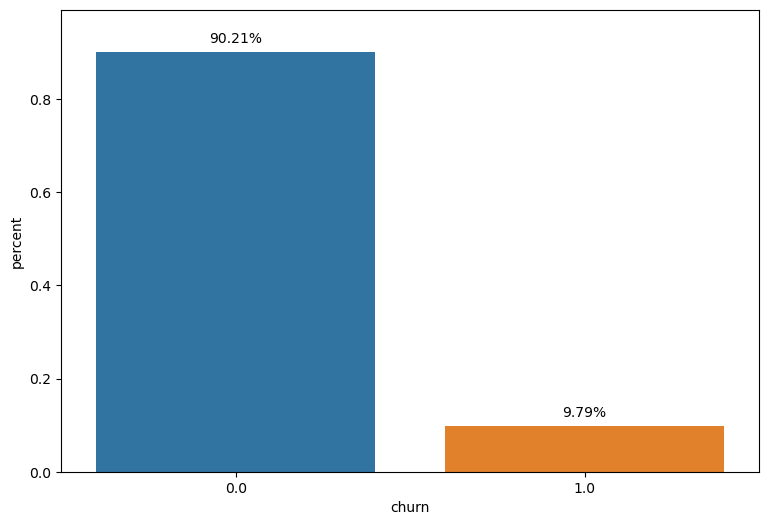

In [300]:
#Among the customers whose off-peak power prices increased(last 3 mo avg), around 9.79% of customers changed their providers.
plot_bar_chart_with_percent_label(df=price_stat_3_month[price_stat_3_month['diff_Dec_mean_price_off_peak_fix']>0], target_variable='churn', gap_label_bar=0.02)

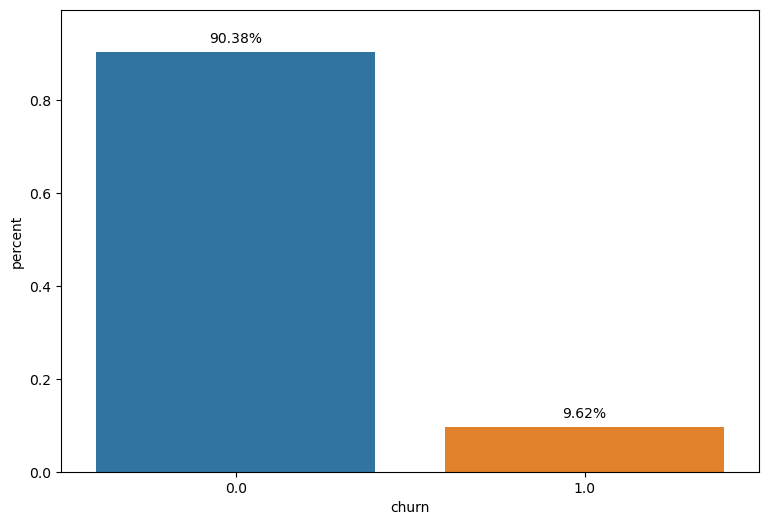

In [301]:
#Among the customers whose off-peak power prices decreased or never changed(last 3 mo avg), around 9.62% of customers changed their providers.
plot_bar_chart_with_percent_label(df=price_stat_3_month[price_stat_3_month['diff_Dec_mean_price_off_peak_fix']<=0], target_variable='churn', gap_label_bar=0.02)

In [302]:
#From the above findings, we can conclude that the customer churn is sensitive to prices

In [303]:
#Task 3 - Feature Engineering & Modelling

In [304]:
# load packages
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [451]:
# drop useless columns
train_data = client_df.copy()
train_data['year_modif_prod'] = train_data['date_modif_prod'].dt.year
train_data['year_renewal'] = train_data['date_renewal'].dt.year
train_data = train_data.drop(columns=['date_activ','date_end','date_modif_prod','date_renewal'])
# 
has_gas_encoder = LabelEncoder()
train_data['has_gas'] = has_gas_encoder.fit_transform(train_data['has_gas'])

#sorting based on 'price_date'
price_df_sorted = price_df.sort_values(by=['price_date'])

# add new feature "diff_dec_jan_off_peak_var". I just calculate the difference between last price and first price for each customer.
diff_dec_jan_off_peak_var = price_df_sorted.groupby(['id'])['price_off_peak_var'].apply(lambda x: x.iloc[-1] - x.iloc[0]).reset_index(name='diff_dec_jan_off_peak_var')

train_data = train_data.merge(diff_dec_jan_off_peak_var, on='id', how='left')

# also add the above differences of other prices

for attr in ['price_off_peak_fix','price_peak_var','price_peak_fix','price_mid_peak_var','price_mid_peak_fix']:
    diff_dec_jan_temp = price_df_sorted.groupby(['id'])[attr].apply(lambda x: x.iloc[-1] - x.iloc[0])
    diff_dec_jan_temp = diff_dec_jan_temp.reset_index(name=f'diff_dec_jan_{attr}')
    train_data = train_data.merge(diff_dec_jan_temp, on='id', how='left')

# add price changing trends
train_data = train_data.merge(price_stat[['id','diff_Dec_mean_price_off_peak_var','diff_Dec_mean_price_off_peak_fix',
                                          'diff_Dec_mean_price_peak_var','diff_Dec_mean_price_peak_fix',
                                          'diff_Dec_mean_price_mid_peak_var','diff_Dec_mean_price_mid_peak_fix',
                                        ]], on='id', how='left')

train_data.head(5)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,...,diff_dec_jan_price_peak_var,diff_dec_jan_price_peak_fix,diff_dec_jan_price_mid_peak_var,diff_dec_jan_price_mid_peak_fix,diff_Dec_mean_price_off_peak_var,diff_Dec_mean_price_off_peak_fix,diff_Dec_mean_price_peak_var,diff_Dec_mean_price_peak_fix,diff_Dec_mean_price_mid_peak_var,diff_Dec_mean_price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,4,0,54946,0,0.00,0,0.0,1.78,0.114481,...,-0.017912,-24.339581,-0.071536,-16.226389,-0.006612,-0.213380,-0.000258,2.085320,0.007986,1.390215
1,d29c2c54acc38ff3c0614d0a653813dd,0,4660,0,0,189.95,0,0.0,16.27,0.145711,...,0.000000,0.000000,0.000000,0.000000,0.015775,-0.044445,0.079204,0.000000,0.000000,0.000000
2,764c75f661154dac3a6c254cd082ea7d,4,544,0,0,47.96,0,0.0,38.72,0.165794,...,0.000528,0.000000,0.000000,0.000000,-0.022834,0.059260,-0.088421,0.000000,0.000000,0.000000
3,bba03439a292a1e166f80264c16191cb,5,1584,0,0,240.04,0,0.0,19.83,0.146694,...,0.000000,0.000000,0.000000,0.000000,-0.003610,0.044445,0.000000,0.000000,0.000000,0.000000
4,149d57cf92fc41cf94415803a877cb4b,0,4425,0,526,445.75,526,0.0,131.73,0.116900,...,-0.002302,0.097749,0.003487,0.065166,0.023426,3.756554,-0.103638,-24.412893,-0.072865,-16.275263


In [450]:
train_data.head(5)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,...,net_margin,num_years_antig,origin_up,pow_max,churn,contract_start_year,contract_end_year,year_modif_prod,year_renewal,diff_dec_jan_off_peak_var
0,24011ae4ebbe3035111d65fa7c15bc57,4,0,54946,0,0.00,0,0.0,1.78,0.114481,...,678.99,3,4,43.648,1,2013,2016,2015,2015,0.020057
1,d29c2c54acc38ff3c0614d0a653813dd,0,4660,0,0,189.95,0,0.0,16.27,0.145711,...,18.89,6,2,13.800,0,2009,2016,2009,2015,-0.003767
2,764c75f661154dac3a6c254cd082ea7d,4,544,0,0,47.96,0,0.0,38.72,0.165794,...,6.60,6,2,13.856,0,2010,2016,2010,2015,-0.004670
3,bba03439a292a1e166f80264c16191cb,5,1584,0,0,240.04,0,0.0,19.83,0.146694,...,25.46,6,2,13.200,0,2010,2016,2010,2015,-0.004547
4,149d57cf92fc41cf94415803a877cb4b,0,4425,0,526,445.75,526,0.0,131.73,0.116900,...,47.98,6,2,19.800,0,2010,2016,2010,2015,-0.006192


In [422]:
price_df

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
...,...,...,...,...,...,...,...,...
192997,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192998,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192999,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193000,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555


In [447]:
df_dff = price_df_sorted.groupby('id')['price_off_peak_var'].apply(lambda x: x.iloc[-1] - x.iloc[0]).reset_index(name='diff')

In [452]:
X = train_data.drop(columns=['id','churn'])
y = train_data['churn']
X.shape, y.shape

((14606, 36), (14606,))

In [454]:
from sklearn.model_selection import KFold

# Assuming X and y are defined
kf = KFold(n_splits=5)  # 5-fold cross-validation

for train_index, test_index in kf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)

TRAIN: [ 2922  2923  2924 ... 14603 14604 14605] TEST: [   0    1    2 ... 2919 2920 2921]
TRAIN: [    0     1     2 ... 14603 14604 14605] TEST: [2922 2923 2924 ... 5840 5841 5842]
TRAIN: [    0     1     2 ... 14603 14604 14605] TEST: [5843 5844 5845 ... 8761 8762 8763]
TRAIN: [    0     1     2 ... 14603 14604 14605] TEST: [ 8764  8765  8766 ... 11682 11683 11684]
TRAIN: [    0     1     2 ... 11682 11683 11684] TEST: [11685 11686 11687 ... 14603 14604 14605]


In [455]:
# 
pred_train_labels = np.zeros(shape=(X.shape[0], 2))   # pred training labels
feature_importance_df = pd.DataFrame(data={'feature_name':X.columns, 'feature_importance':[0]*len(X.columns)})
# create cv dataset
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=29)
fold_counter = 1
for train_index, test_index in kfold.split(X, y):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # build model
    rf = RandomForestClassifier(random_state=56)
    # train model
    rf.fit(X_train, y_train)
    pred_train_labels[test_index] = rf.predict_proba(X_test)
    feature_importance_df['feature_importance'] = feature_importance_df['feature_importance'] + (rf.feature_importances_)
    print(f"Fold {fold_counter} Precision {precision_score(y_test, rf.predict(X_test)):.3f} Recall {recall_score(y_test, rf.predict(X_test)):.3f} Accuracy {accuracy_score(y_test, rf.predict(X_test)):.3f}")
    fold_counter = fold_counter + 1
# predicted labels
pred_y = pred_train_labels.argmax(axis=-1)
print(f"Total  Precision {precision_score(y, pred_y):.3f} Recall {recall_score(y, pred_y):.3f} Accuracy {accuracy_score(y, pred_y):.3f}")

Fold 1 Precision 0.857 Recall 0.021 Accuracy 0.905
Fold 2 Precision 0.727 Recall 0.028 Accuracy 0.904
Fold 3 Precision 1.000 Recall 0.025 Accuracy 0.905
Fold 4 Precision 0.875 Recall 0.025 Accuracy 0.905
Fold 5 Precision 0.643 Recall 0.032 Accuracy 0.904
Total  Precision 0.787 Recall 0.026 Accuracy 0.905


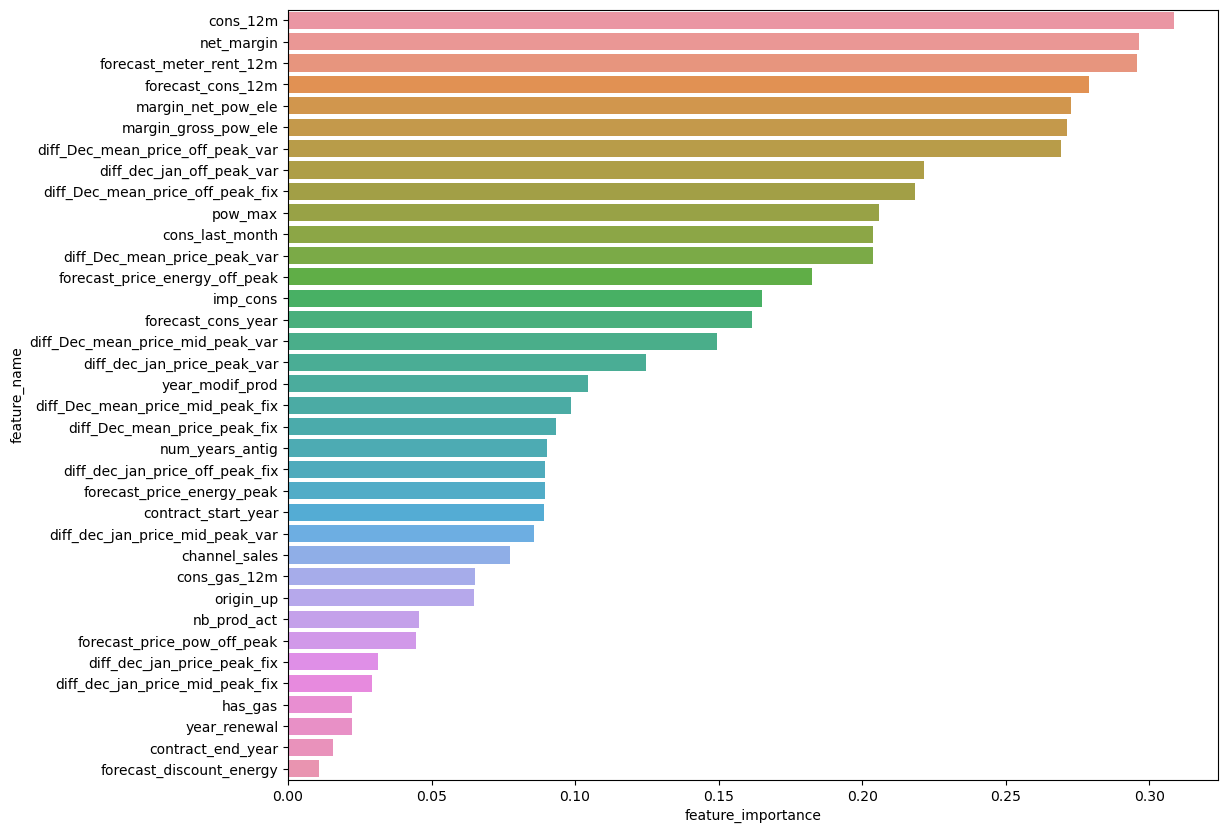

In [456]:
fig = plt.figure(figsize=(12,10))
ax = sns.barplot(data=feature_importance_df.sort_values(by=['feature_importance'], ascending=False), y='feature_name', x='feature_importance')

In [457]:
#main classification metrics

print(classification_report(y, pred_y))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     13187
           1       0.79      0.03      0.05      1419

    accuracy                           0.90     14606
   macro avg       0.85      0.51      0.50     14606
weighted avg       0.89      0.90      0.86     14606



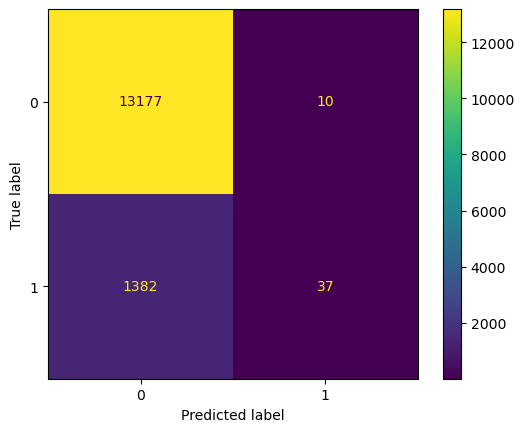

In [458]:
#confusion matrix

cm = confusion_matrix(y, pred_y, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()